In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import os
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
fileName = "C:/Users/Aren Kabarajian/Downloads/usa_00012.csv"
# fileName = "C:/Users/akaba/Downloads/usa_00012.csv"
file = pd.read_csv(fileName)
dfCDI = pd.DataFrame(file)

C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfCDI.shape

(6787855, 40)

In [4]:
dfCDI.columns

Index(['YEAR', 'MULTYEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER',
       'CPI99', 'STATEFIP', 'COUNTYFIP', 'DENSITY', 'CITY', 'PUMA', 'STRATA',
       'GQ', 'OWNERSHP', 'OWNERSHPD', 'OWNCOST', 'RENTGRS', 'HHINCOME',
       'CIHISPEED', 'PERNUM', 'PERWT', 'FAMSIZE', 'SEX', 'AGE', 'RACE',
       'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'OCCSOC', 'INDNAICS',
       'INCTOT', 'FTOTINC', 'INCWAGE', 'MIGCOUNTY1', 'MOVEDIN', 'TRANTIME'],
      dtype='object')

In [5]:
dfCDI = dfCDI[dfCDI['AGE']>=21]
dfCDI.shape

(4823667, 40)

In [6]:
dfHomeOwn=dfCDI[dfCDI['OWNERSHP']==1]
dfHomeOwn.RENTGRS.describe()

count    2964818.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: RENTGRS, dtype: float64

In [7]:
dfCDI = dfCDI[dfCDI['OWNERSHP']!=0]
dfCDI.shape

(4677699, 40)

In [8]:
dfCDI['affrentdec'] = dfCDI['RENTGRS']*12/dfCDI['HHINCOME']

In [9]:
def housingFunc(own, affrentdec):
    if own==1:
        housingCat=2
    elif own==2 and affrentdec<.3:
        housingCat=1
    else:
        housingCat=0
    return housingCat

In [10]:
dfCDI['HousingCat'] = dfCDI.apply(lambda x: housingFunc(x['OWNERSHP'], x['affrentdec']), axis=1)
dfCDI['HousingCat'].value_counts()

2    2964818
1     968222
0     744659
Name: HousingCat, dtype: int64

In [11]:
dfCDI['EDUCbin'] = [1 if x >=8 else 0 for x in dfCDI['EDUC']]
dfCDI['EDUCbin'].value_counts()

0    2937721
1    1739978
Name: EDUCbin, dtype: int64

In [12]:
dfCDI['TRANTIME'].value_counts()

0      1988964
30      394673
15      393749
20      378805
10      319484
        ...   
119          3
118          3
123          3
117          3
126          1
Name: TRANTIME, Length: 133, dtype: int64

## Split by year

In [13]:
dfCDI['YEAR'].value_counts()

2019    1358004
2010    1219545
2000    1119919
1990     980231
Name: YEAR, dtype: int64

In [14]:
df19=dfCDI[dfCDI['YEAR']==2019]
df10=dfCDI[dfCDI['YEAR']==2010]
df00=dfCDI[dfCDI['YEAR']==2000]
df90=dfCDI[dfCDI['YEAR']==1990]

In [15]:
print(dfCDI.columns.get_loc("HousingCat"))
print(dfCDI.columns.get_loc("EDUCbin"))
print(dfCDI.columns.get_loc("TRANTIME"))
print(dfCDI.columns.get_loc("HHWT"))
print(dfCDI.columns.get_loc("HHINCOME"))
print(dfCDI.columns.get_loc("RACE"))
print(dfCDI.columns.get_loc("AGE"))
print(dfCDI.columns.get_loc("SEX"))
print(dfCDI.columns.get_loc("COUNTYFIP"))
print(dfCDI.columns.get_loc("HISPAN"))

41
42
39
5
19
26
25
24
9
28


In [16]:
x19 = df19.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x10 = df10.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x00 = df00.iloc[:, [41,42,39,5,19,26,25,24,9,28]]
x90 = df90.iloc[:, [41,42,39,5,19,26,25,24,9,28]]

## Scaling Values

In [17]:

scaler = StandardScaler()
scalerNum = scaler.fit(x19)
scalerNum1 = scaler.fit(x10)
scalerNum2 = scaler.fit(x00)
scalerNum3 = scaler.fit(x90)
xstd19 = scalerNum.transform(x19)
xstd10 = scalerNum1.transform(x10)
xstd00 = scalerNum2.transform(x00)
xstd90 = scalerNum3.transform(x90)

In [18]:
dfX19 = pd.DataFrame(xstd19, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX10 = pd.DataFrame(xstd10, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX00 = pd.DataFrame(xstd00, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX90 = pd.DataFrame(xstd90, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])

## Sillouette Score 

In [19]:
#2019
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX19.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX19.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.4103988352048995
For n_clusters = 3 the average silhouette_score is: 0.442046858597281
For n_clusters = 4 the average silhouette_score is: 0.5058711182866212
For n_clusters = 5 the average silhouette_score is: 0.5369751093731643
For n_clusters = 6 the average silhouette_score is: 0.545764900947138
For n_clusters = 7 the average silhouette_score is: 0.5693570408549938


In [20]:
#2010 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX10.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX10.iloc[:,0:3], cluster_labels, metric='euclidean', sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.4336987873673348
For n_clusters = 3 the average silhouette_score is: 0.4877301422688091
For n_clusters = 4 the average silhouette_score is: 0.5337714205674362
For n_clusters = 5 the average silhouette_score is: 0.5616814289526859
For n_clusters = 6 the average silhouette_score is: 0.5565599884809858
For n_clusters = 7 the average silhouette_score is: 0.5884202318213301


In [21]:
#2000 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX00.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX00.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.43501223911919695
For n_clusters = 3 the average silhouette_score is: 0.46355082047677787
For n_clusters = 4 the average silhouette_score is: 0.5089506530562351
For n_clusters = 5 the average silhouette_score is: 0.5156743039201428
For n_clusters = 6 the average silhouette_score is: 0.5477264990527695
For n_clusters = 7 the average silhouette_score is: 0.566760612458302


In [22]:
#1990 
for i in range(2,8):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    cluster_labels = km.fit_predict(dfX90.iloc[:,0:3])
    silhouette_avg = silhouette_score(dfX90.iloc[:,0:3], cluster_labels, metric='euclidean',sample_size = 10000, random_state=None)
    print('For n_clusters = {} the average silhouette_score is: {}'.format(i, silhouette_avg))

For n_clusters = 2 the average silhouette_score is: 0.4358825264722271
For n_clusters = 3 the average silhouette_score is: 0.4847545861074116
For n_clusters = 4 the average silhouette_score is: 0.5179835067593557
For n_clusters = 5 the average silhouette_score is: 0.5474852352343116
For n_clusters = 6 the average silhouette_score is: 0.5550597734617039
For n_clusters = 7 the average silhouette_score is: 0.5821551491754794


## Clustering

### 2019

In [23]:
#clustering and means table 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX19.iloc[:,0:3])
X19fin = scaler.inverse_transform(dfX19)
dfX19fin = pd.DataFrame(X19fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX19fin['labels'] = kmeans.labels_
cluster_sum19 = dfX19fin.groupby(by = 'labels').mean()
cluster_sum19.head(4)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,1.799385,1.000000,12.916467,17.956563,173946.110232,2.457863,50.998305,1.532594,54.820877,0.235385
1,0.000000,0.287396,10.451930,23.018457,38730.930909,2.967576,45.252069,1.561326,52.060037,0.650695
2,1.524420,0.469698,69.495130,19.508688,148009.041538,2.909480,43.849215,1.400276,50.465479,0.560591
3,1.757582,0.000000,9.116488,19.048280,104816.696227,2.703187,52.624218,1.528055,53.225065,0.584194


In [24]:
#median table
round(dfX19fin.groupby(by = 'labels').median(),2)

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.0,1.0,10.0,14.0,134539.0,1.0,51.0,2.0,59.0,0.0
1,0.0,0.0,0.0,18.0,33374.0,1.0,42.0,2.0,41.0,0.0
2,2.0,0.0,60.0,15.0,118102.0,1.0,43.0,1.0,37.0,0.0
3,2.0,0.0,0.0,14.0,84000.0,1.0,54.0,2.0,59.0,0.0


In [25]:
#seperate Clusters
clust2019_0 = dfX19fin[dfX19fin['labels']==0]
clust2019_1 = dfX19fin[dfX19fin['labels']==1]
clust2019_2 = dfX19fin[dfX19fin['labels']==2]
clust2019_3 = dfX19fin[dfX19fin['labels']==3]

In [26]:

clust0size2019=clust2019_0.HHWT.sum()/dfX19fin.HHWT.sum()
clust1size2019=clust2019_1.HHWT.sum()/dfX19fin.HHWT.sum()
clust2size2019=clust2019_2.HHWT.sum()/dfX19fin.HHWT.sum()
clust3size2019=clust2019_3.HHWT.sum()/dfX19fin.HHWT.sum()

i=0
for x in [clust0size2019,clust1size2019,clust2size2019,clust3size2019]:
    print("Cluster",i,"-",(x*100).astype(int),"% of total")
    i+=1

Cluster 0 - 31 % of total
Cluster 1 - 19 % of total
Cluster 2 - 10 % of total
Cluster 3 - 38 % of total


## Incorperate Household Weights 


In [27]:
hhTotal0_2019=clust2019_0['HHWT'].sum()
hhTotal1_2019=clust2019_1['HHWT'].sum()
hhTotal2_2019=clust2019_2['HHWT'].sum()
hhTotal3_2019=clust2019_3['HHWT'].sum()

In [28]:
clust2019_0['RowWt'] = clust2019_0['HHWT']/hhTotal0_2019
clust2019_1['RowWt'] = clust2019_1['HHWT']/hhTotal1_2019
clust2019_2['RowWt'] = clust2019_2['HHWT']/hhTotal2_2019
clust2019_3['RowWt'] = clust2019_3['HHWT']/hhTotal3_2019

<ipython-input-28-6d6538c7cde2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust2019_0['RowWt'] = clust2019_0['HHWT']/hhTotal0_2019
<ipython-input-28-6d6538c7cde2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust2019_1['RowWt'] = clust2019_1['HHWT']/hhTotal1_2019
<ipython-input-28-6d6538c7cde2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

## Housing Category

In [29]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfHousing_2019 = pd.DataFrame(index=clustNames, data=np.array([[clust2019_0.loc[clust2019_0['HousingCat']==0].RowWt.sum(),
                                                     clust2019_0.loc[clust2019_0['HousingCat']==1].RowWt.sum(),
                                                     clust2019_0.loc[clust2019_0['HousingCat']==2].RowWt.sum()], 
                                                    [clust2019_1.loc[clust2019_1['HousingCat']==0].RowWt.sum(),
                                                     clust2019_1.loc[clust2019_1['HousingCat']==1].RowWt.sum(),
                                                     clust2019_1.loc[clust2019_1['HousingCat']==2].RowWt.sum()],
                                                    [clust2019_2.loc[clust2019_2['HousingCat']==0].RowWt.sum(),
                                                     clust2019_2.loc[clust2019_2['HousingCat']==1].RowWt.sum(),
                                                     clust2019_2.loc[clust2019_2['HousingCat']==2].RowWt.sum()],
                                                    [clust2019_3.loc[clust2019_3['HousingCat']==0].RowWt.sum(),
                                                     clust2019_3.loc[clust2019_3['HousingCat']==1].RowWt.sum(),
                                                     clust2019_3.loc[clust2019_3['HousingCat']==2].RowWt.sum()],
                                                    ]),
                   columns=['>=30% Income on Rent', '<30% Income on Rent', 'Owner'])
dfHousing_2019

,>=30% Income on Rent,<30% Income on Rent,Owner
Cluster 0,0.000000,0.235665,0.764335
Cluster 1,1.000000,0.000000,0.000000
Cluster 2,0.119719,0.299405,0.580876
Cluster 3,0.000000,0.287694,0.712306


## Education (binary)

In [30]:
#Education Binary Table 
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfEDU_2019 = pd.DataFrame(index=clustNames, data=np.array([[clust2019_0.loc[clust2019_0['EDUCbin']==0].RowWt.sum(),
                                                     clust2019_0.loc[clust2019_0['EDUCbin']==1].RowWt.sum()], 
                                                    [clust2019_1.loc[clust2019_1['EDUCbin']==0].RowWt.sum(),
                                                     clust2019_1.loc[clust2019_1['EDUCbin']==1].RowWt.sum()],
                                                    [clust2019_2.loc[clust2019_2['EDUCbin']==0].RowWt.sum(),
                                                     clust2019_2.loc[clust2019_2['EDUCbin']==1].RowWt.sum()],
                                                    [clust2019_3.loc[clust2019_3['EDUCbin']==0].RowWt.sum(),
                                                     clust2019_3.loc[clust2019_3['EDUCbin']==1].RowWt.sum(),
                                                    ]]),
                   columns=['<2 yr. College', '>2 yr. College'])
dfEDU_2019

,<2 yr. College,>2 yr. College
Cluster 0,0.000000,1.000000
Cluster 1,0.732596,0.267404
Cluster 2,0.550536,0.449464
Cluster 3,1.000000,0.000000


## Commute Time

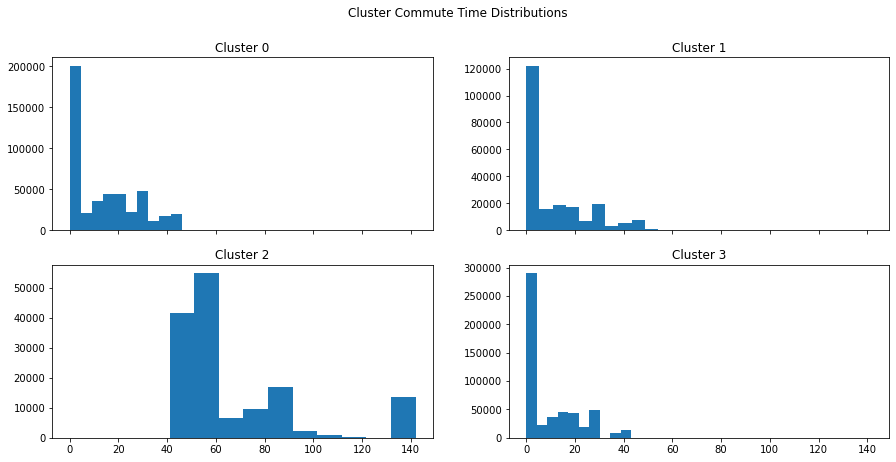

In [31]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15,7))
fig.suptitle("Cluster Commute Time Distributions")

axs[0, 0].hist(clust2019_0['TRANTIME'])
axs[0, 0].set_title('Cluster 0')
axs[0, 1].hist(clust2019_1['TRANTIME'])
axs[0, 1].set_title('Cluster 1')
axs[1, 0].hist(clust2019_2['TRANTIME'])
axs[1, 0].set_title('Cluster 2')
axs[1, 1].hist(clust2019_3['TRANTIME'])
axs[1, 1].set_title('Cluster 3')

for ax in axs[2:]:
    ax.set(xlabel='Commute Time (Minutes)')

# Demographics

## Race

In [32]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfR19 = pd.DataFrame(index=clustNames, data=np.array([[clust2019_0.loc[clust2019_0['RACE']==1].RowWt.sum(),clust2019_0.loc[clust2019_0['RACE']==2].RowWt.sum(),clust2019_0.loc[clust2019_0['RACE']==3].RowWt.sum(),
                                                    clust2019_0.loc[clust2019_0['RACE']==4].RowWt.sum(),clust2019_0.loc[clust2019_0['RACE']==5].RowWt.sum(),clust2019_0.loc[clust2019_0['RACE']==6].RowWt.sum(),
                                                    clust2019_0.loc[clust2019_0['RACE']==7].RowWt.sum(),clust2019_0.loc[clust2019_0['RACE']==8].RowWt.sum(),clust2019_0.loc[clust2019_0['RACE']==9].RowWt.sum()], 
                                                    [clust2019_1.loc[clust2019_1['RACE']==1].RowWt.sum(),clust2019_1.loc[clust2019_1['RACE']==2].RowWt.sum(),clust2019_1.loc[clust2019_1['RACE']==3].RowWt.sum(),
                                                    clust2019_1.loc[clust2019_1['RACE']==4].RowWt.sum(),clust2019_1.loc[clust2019_1['RACE']==5].RowWt.sum(),clust2019_1.loc[clust2019_1['RACE']==6].RowWt.sum(),
                                                    clust2019_1.loc[clust2019_1['RACE']==7].RowWt.sum(),clust2019_1.loc[clust2019_1['RACE']==8].RowWt.sum(),clust2019_1.loc[clust2019_1['RACE']==9].RowWt.sum()],
                                                    [clust2019_2.loc[clust2019_2['RACE']==1].RowWt.sum(),clust2019_2.loc[clust2019_2['RACE']==2].RowWt.sum(),clust2019_2.loc[clust2019_2['RACE']==3].RowWt.sum(),
                                                    clust2019_2.loc[clust2019_2['RACE']==4].RowWt.sum(),clust2019_2.loc[clust2019_2['RACE']==5].RowWt.sum(),clust2019_2.loc[clust2019_2['RACE']==6].RowWt.sum(),
                                                    clust2019_2.loc[clust2019_2['RACE']==7].RowWt.sum(),clust2019_2.loc[clust2019_2['RACE']==8].RowWt.sum(),clust2019_2.loc[clust2019_2['RACE']==9].RowWt.sum()],
                                                    [clust2019_3.loc[clust2019_3['RACE']==1].RowWt.sum(),clust2019_3.loc[clust2019_3['RACE']==2].RowWt.sum(),clust2019_3.loc[clust2019_3['RACE']==3].RowWt.sum(),
                                                    clust2019_3.loc[clust2019_3['RACE']==4].RowWt.sum(),clust2019_3.loc[clust2019_3['RACE']==5].RowWt.sum(),clust2019_3.loc[clust2019_3['RACE']==6].RowWt.sum(),
                                                    clust2019_3.loc[clust2019_3['RACE']==7].RowWt.sum(),clust2019_3.loc[clust2019_3['RACE']==8].RowWt.sum(),clust2019_3.loc[clust2019_3['RACE']==9].RowWt.sum()]]),
    columns=['White','Black','Native American/Alaskan','Chinese','Japanese','Other Asian/Pac. Islander','Other Race','Two Major Races','Three +'])
dfR19                   

,White,Black,Native American/Alaskan,Chinese,Japanese,Other Asian/Pac. Islander,Other Race,Two Major Races,Three +
Cluster 0,0.653787,0.040305,0.004148,0.069021,0.014027,0.143828,0.041435,0.029207,0.004242
Cluster 1,0.562744,0.088241,0.008380,0.033496,0.005731,0.090724,0.173949,0.032505,0.004231
Cluster 2,0.577317,0.062610,0.007071,0.048897,0.007038,0.118195,0.140074,0.033835,0.004963
Cluster 3,0.630308,0.047311,0.009680,0.030260,0.006004,0.079932,0.164489,0.028413,0.003603


## Income

In [33]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfI2019 = pd.DataFrame(index=clustNames, data=np.array([[clust2019_0.loc[clust2019_0['HHINCOME']<50000].RowWt.sum(),
                                                     clust2019_0.loc[(clust2019_0['HHINCOME']>=50000) & (clust2019_0['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2019_0.loc[clust2019_0['HHINCOME']>=150000].RowWt.sum()], 
                                                    [clust2019_1.loc[clust2019_1['HHINCOME']<50000].RowWt.sum(),
                                                     clust2019_1.loc[(clust2019_1['HHINCOME']>=50000) & (clust2019_1['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2019_1.loc[clust2019_1['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust2019_2.loc[clust2019_2['HHINCOME']<50000].RowWt.sum(),
                                                     clust2019_2.loc[(clust2019_2['HHINCOME']>=50000) & (clust2019_2['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2019_2.loc[clust2019_2['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust2019_3.loc[clust2019_3['HHINCOME']<50000].RowWt.sum(),
                                                     clust2019_3.loc[(clust2019_3['HHINCOME']>=50000) & (clust2019_3['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2019_3.loc[clust2019_3['HHINCOME']>=150000].RowWt.sum()]]),
                   columns=['< 50,000', '  50,000 - 150,000', '>=150,000'])
dfI2019

,"< 50,000","50,000 - 150,000",">=150,000"
Cluster 0,0.105022,0.456218,0.438761
Cluster 1,0.715958,0.282012,0.002030
Cluster 2,0.139435,0.518457,0.342108
Cluster 3,0.239348,0.576670,0.183982


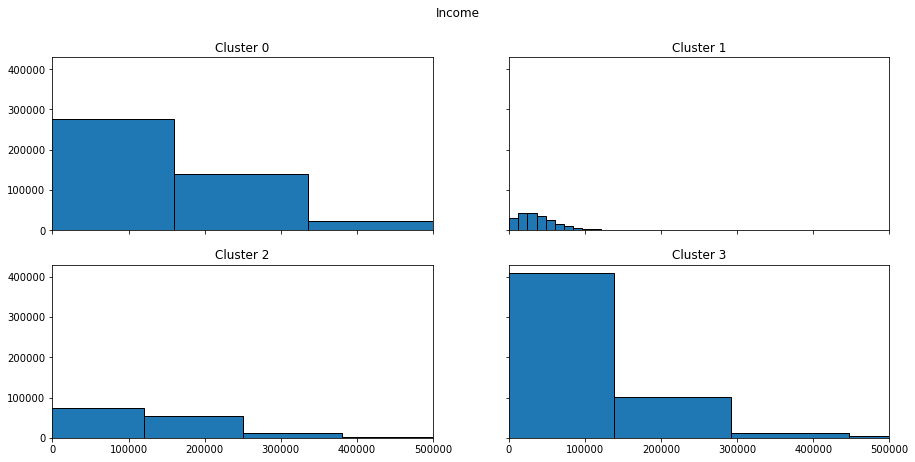

In [34]:
#Com
fig, axs = plt.subplots(2, 2, sharex=True,sharey=True, figsize=(15,7))
fig.suptitle("Income")

axs[0, 0].hist(clust2019_0['HHINCOME'],bins=15,edgecolor = "black")
axs[0, 0].set_title('Cluster 0')
axs[0, 0].set_xlim([0, 500000])
axs[0, 1].hist(clust2019_1['HHINCOME'],bins=15,edgecolor = "black")
axs[0, 1].set_title('Cluster 1')
axs[0, 1].set_xlim([0, 500000])
axs[1, 0].hist(clust2019_2['HHINCOME'],bins=15,edgecolor = "black")
axs[1, 0].set_title('Cluster 2')
axs[1, 0].set_xlim([0, 500000])
axs[1, 1].hist(clust2019_3['HHINCOME'],bins=15,edgecolor = "black")
axs[1, 1].set_title('Cluster 3')
axs[1, 1].set_xlim([0, 500000])

for ax in axs[2:]:
    ax.set(xlabel='Income')

<AxesSubplot:>

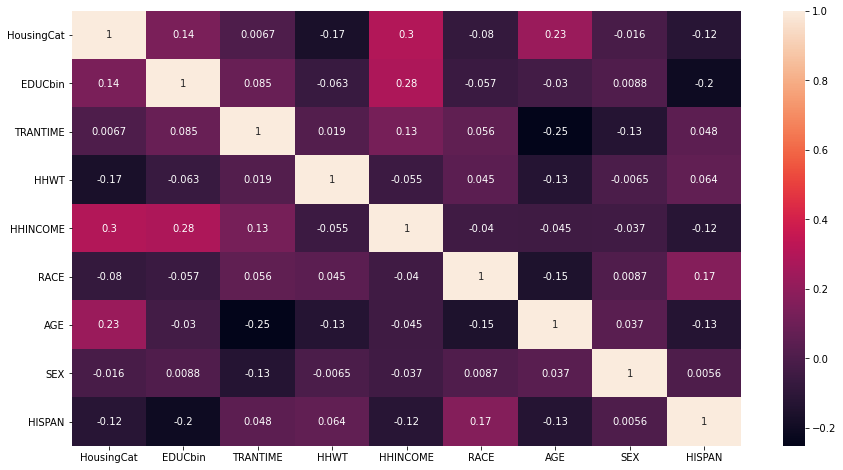

In [35]:
Xcorr19=dfX19fin.iloc[:, [0,1,2,3,4,5,6,7,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr19.corr(), annot = True)


### 2010

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX10.iloc[:,0:3])
X10fin = scaler.inverse_transform(dfX10)
dfX10fin = pd.DataFrame(X10fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX10fin['labels'] = kmeans.labels_
cluster_sum10 = dfX10fin.groupby(by = 'labels').mean()
cluster_sum10.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,8.311891,18.186226,86534.360075,2.448684,53.102443,1.548827,53.831618,0.470251
1,1.816378,1.000000,11.849024,18.170878,136511.353001,2.262138,49.380391,1.524656,55.140022,0.193769
2,0.391211,0.145278,10.025884,22.861778,46992.433084,2.895852,43.351310,1.539566,52.248687,0.628307
3,1.616042,0.485011,64.852713,20.161208,116646.961642,2.698102,43.321468,1.388535,51.684387,0.478809


In [37]:
#median table
round(dfX10fin.groupby(by = 'labels').median(),2)

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.0,0.0,0.0,15.0,69600.0,1.0,53.0,2.0,59.0,0.0
1,2.0,1.0,10.0,15.0,108163.0,1.0,49.0,2.0,59.0,0.0
2,0.0,0.0,3.0,18.0,37473.0,1.0,40.0,2.0,47.0,0.0
3,2.0,0.0,60.0,16.0,96519.0,1.0,43.0,1.0,59.0,0.0


In [38]:
#seperate Clusters
clust2010_0 = dfX10fin[dfX10fin['labels']==0]
clust2010_1 = dfX10fin[dfX10fin['labels']==1]
clust2010_2 = dfX10fin[dfX10fin['labels']==2]
clust2010_3 = dfX10fin[dfX10fin['labels']==3]

In [39]:

clust0size2010=clust2010_0.HHWT.sum()/dfX10fin.HHWT.sum()
clust1size2010=clust2010_1.HHWT.sum()/dfX10fin.HHWT.sum()
clust2size2010=clust2010_2.HHWT.sum()/dfX10fin.HHWT.sum()
clust3size2010=clust2010_3.HHWT.sum()/dfX10fin.HHWT.sum()

i=0
for x in [clust0size2010,clust1size2010,clust2size2010,clust3size2010]:
    print("Cluster",i,"-",(x*100).astype(int),"% of total")
    i+=1

Cluster 0 - 31 % of total
Cluster 1 - 28 % of total
Cluster 2 - 29 % of total
Cluster 3 - 10 % of total


## Incorperate Household Weights 


In [40]:
hhTotal0_2010=clust2010_0['HHWT'].sum()
hhTotal1_2010=clust2010_1['HHWT'].sum()
hhTotal2_2010=clust2010_2['HHWT'].sum()
hhTotal3_2010=clust2010_3['HHWT'].sum()

In [41]:
clust2010_0['RowWt'] = clust2010_0['HHWT']/hhTotal0_2010
clust2010_1['RowWt'] = clust2010_1['HHWT']/hhTotal1_2010
clust2010_2['RowWt'] = clust2010_2['HHWT']/hhTotal2_2010
clust2010_3['RowWt'] = clust2010_3['HHWT']/hhTotal3_2010

<ipython-input-41-b3d0d5378372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust2010_0['RowWt'] = clust2010_0['HHWT']/hhTotal0_2010
<ipython-input-41-b3d0d5378372>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust2010_1['RowWt'] = clust2010_1['HHWT']/hhTotal1_2010
<ipython-input-41-b3d0d5378372>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

## Housing Category


In [42]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfHousing_2010 = pd.DataFrame(index=clustNames, data=np.array([[clust2010_0.loc[clust2010_0['HousingCat']==0].RowWt.sum(),
                                                     clust2010_0.loc[clust2010_0['HousingCat']==1].RowWt.sum(),
                                                     clust2010_0.loc[clust2010_0['HousingCat']==2].RowWt.sum()], 
                                                    [clust2010_1.loc[clust2010_1['HousingCat']==0].RowWt.sum(),
                                                     clust2010_1.loc[clust2010_1['HousingCat']==1].RowWt.sum(),
                                                     clust2010_1.loc[clust2010_1['HousingCat']==2].RowWt.sum()],
                                                    [clust2010_2.loc[clust2010_2['HousingCat']==0].RowWt.sum(),
                                                     clust2010_2.loc[clust2010_2['HousingCat']==1].RowWt.sum(),
                                                     clust2010_2.loc[clust2010_2['HousingCat']==2].RowWt.sum()],
                                                    [clust2010_3.loc[clust2010_3['HousingCat']==0].RowWt.sum(),
                                                     clust2010_3.loc[clust2010_3['HousingCat']==1].RowWt.sum(),
                                                     clust2010_3.loc[clust2010_3['HousingCat']==2].RowWt.sum()],
                                                    ]),
                   columns=['>=30% Income on Rent', '<30% Income on Rent', 'Owner'])
dfHousing_2010


,>=30% Income on Rent,<30% Income on Rent,Owner
Cluster 0,0.000000,0.000000,1.000000
Cluster 1,0.000000,0.214550,0.785450
Cluster 2,0.613687,0.386313,0.000000
Cluster 3,0.105653,0.230412,0.663935


## Education (binary)

In [43]:
#Education Binary Table 
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfEDU_2010 = pd.DataFrame(index=clustNames, data=np.array([[clust2010_0.loc[clust2010_0['EDUCbin']==0].RowWt.sum(),
                                                     clust2010_0.loc[clust2010_0['EDUCbin']==1].RowWt.sum()], 
                                                    [clust2010_1.loc[clust2010_1['EDUCbin']==0].RowWt.sum(),
                                                     clust2010_1.loc[clust2010_1['EDUCbin']==1].RowWt.sum()],
                                                    [clust2010_2.loc[clust2010_2['EDUCbin']==0].RowWt.sum(),
                                                     clust2010_2.loc[clust2010_2['EDUCbin']==1].RowWt.sum()],
                                                    [clust2010_3.loc[clust2010_3['EDUCbin']==0].RowWt.sum(),
                                                     clust2010_3.loc[clust2010_3['EDUCbin']==1].RowWt.sum(),
                                                    ]]),
                   columns=['<2 yr. College', '>2 yr. College'])
dfEDU_2010


,<2 yr. College,>2 yr. College
Cluster 0,1.000000,0.000000
Cluster 1,0.000000,1.000000
Cluster 2,0.862528,0.137472
Cluster 3,0.538875,0.461125


## Commute Time

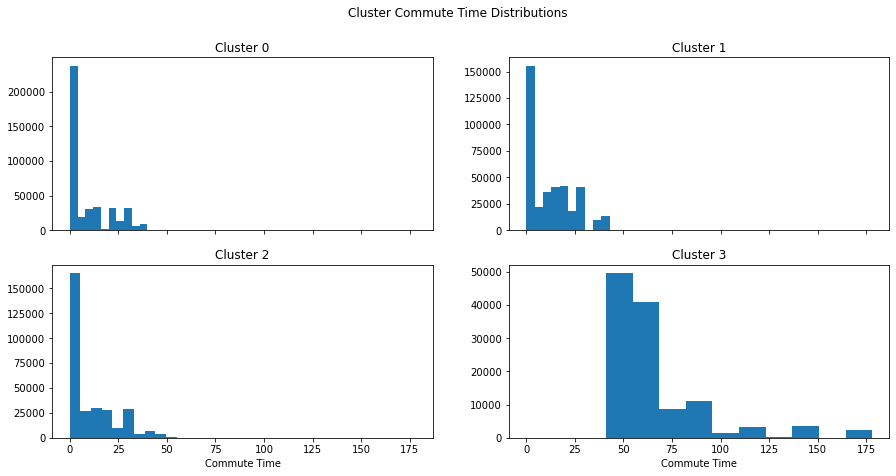

In [44]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15,7))
fig.suptitle("Cluster Commute Time Distributions")

axs[0, 0].hist(clust2010_0['TRANTIME'])
axs[0, 0].set_title('Cluster 0')
axs[0, 1].hist(clust2010_1['TRANTIME'])
axs[0, 1].set_title('Cluster 1')
axs[1, 0].hist(clust2010_2['TRANTIME'])
axs[1, 0].set_title('Cluster 2')
axs[1,0].set_xlabel('Commute Time')
axs[1, 1].hist(clust2010_3['TRANTIME'])
axs[1, 1].set_title('Cluster 3')
axs[1,1].set_xlabel('Commute Time')


for ax in axs[2:]:
    axs.set(xlabel='Commute Time (Minutes)')

# Demographics

## Race

In [45]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfR10 = pd.DataFrame(index=clustNames, data=np.array([[clust2010_0.loc[clust2010_0['RACE']==1].RowWt.sum(),clust2010_0.loc[clust2010_0['RACE']==2].RowWt.sum(),clust2010_0.loc[clust2010_0['RACE']==3].RowWt.sum(),
                                                    clust2010_0.loc[clust2010_0['RACE']==4].RowWt.sum(),clust2010_0.loc[clust2010_0['RACE']==5].RowWt.sum(),clust2010_0.loc[clust2010_0['RACE']==6].RowWt.sum(),
                                                    clust2010_0.loc[clust2010_0['RACE']==7].RowWt.sum(),clust2010_0.loc[clust2010_0['RACE']==8].RowWt.sum(),clust2010_0.loc[clust2010_0['RACE']==9].RowWt.sum()], 
                                                    [clust2010_1.loc[clust2010_1['RACE']==1].RowWt.sum(),clust2010_1.loc[clust2010_1['RACE']==2].RowWt.sum(),clust2010_1.loc[clust2010_1['RACE']==3].RowWt.sum(),
                                                    clust2010_1.loc[clust2010_1['RACE']==4].RowWt.sum(),clust2010_1.loc[clust2010_1['RACE']==5].RowWt.sum(),clust2010_1.loc[clust2010_1['RACE']==6].RowWt.sum(),
                                                    clust2010_1.loc[clust2010_1['RACE']==7].RowWt.sum(),clust2010_1.loc[clust2010_1['RACE']==8].RowWt.sum(),clust2010_1.loc[clust2010_1['RACE']==9].RowWt.sum()],
                                                    [clust2010_2.loc[clust2010_2['RACE']==1].RowWt.sum(),clust2010_2.loc[clust2010_2['RACE']==2].RowWt.sum(),clust2010_2.loc[clust2010_2['RACE']==3].RowWt.sum(),
                                                    clust2010_2.loc[clust2010_2['RACE']==4].RowWt.sum(),clust2010_2.loc[clust2010_2['RACE']==5].RowWt.sum(),clust2010_2.loc[clust2010_2['RACE']==6].RowWt.sum(),
                                                    clust2010_2.loc[clust2010_2['RACE']==7].RowWt.sum(),clust2010_2.loc[clust2010_2['RACE']==8].RowWt.sum(),clust2010_2.loc[clust2010_2['RACE']==9].RowWt.sum()],
                                                    [clust2010_3.loc[clust2010_3['RACE']==1].RowWt.sum(),clust2010_3.loc[clust2010_3['RACE']==2].RowWt.sum(),clust2010_3.loc[clust2010_3['RACE']==3].RowWt.sum(),
                                                    clust2010_3.loc[clust2010_3['RACE']==4].RowWt.sum(),clust2010_3.loc[clust2010_3['RACE']==5].RowWt.sum(),clust2010_3.loc[clust2010_3['RACE']==6].RowWt.sum(),
                                                    clust2010_3.loc[clust2010_3['RACE']==7].RowWt.sum(),clust2010_3.loc[clust2010_3['RACE']==8].RowWt.sum(),clust2010_3.loc[clust2010_3['RACE']==9].RowWt.sum()]]),
    columns=['White','Black','Native American/Alaskan','Chinese','Japanese','Other Asian/Pac. Islander','Other Race','Two Major Races','Three +'])
dfR10                 

,White,Black,Native American/Alaskan,Chinese,Japanese,Other Asian/Pac. Islander,Other Race,Two Major Races,Three +
Cluster 0,0.675387,0.042154,0.008799,0.027285,0.008411,0.070262,0.143244,0.023106,0.001352
Cluster 1,0.686441,0.042325,0.004017,0.058889,0.015610,0.129369,0.041307,0.020416,0.001625
Cluster 2,0.571698,0.083075,0.009980,0.026022,0.006233,0.085050,0.192192,0.023864,0.001886
Cluster 3,0.602878,0.067185,0.006775,0.042237,0.009467,0.105235,0.138893,0.025768,0.001562


## Income

In [46]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfI2010 = pd.DataFrame(index=clustNames, data=np.array([[clust2010_0.loc[clust2010_0['HHINCOME']<50000].RowWt.sum(),
                                                     clust2010_0.loc[(clust2010_0['HHINCOME']>=50000) & (clust2010_0['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2010_0.loc[clust2010_0['HHINCOME']>=150000].RowWt.sum()], 
                                                    [clust2010_1.loc[clust2010_1['HHINCOME']<50000].RowWt.sum(),
                                                     clust2010_1.loc[(clust2010_1['HHINCOME']>=50000) & (clust2010_1['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2010_1.loc[clust2010_1['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust2010_2.loc[clust2010_2['HHINCOME']<50000].RowWt.sum(),
                                                     clust2010_2.loc[(clust2010_2['HHINCOME']>=50000) & (clust2010_2['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2010_2.loc[clust2010_2['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust2010_3.loc[clust2010_3['HHINCOME']<50000].RowWt.sum(),
                                                     clust2010_3.loc[(clust2010_3['HHINCOME']>=50000) & (clust2010_3['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2010_3.loc[clust2010_3['HHINCOME']>=150000].RowWt.sum()]]),
                   columns=['< 50,000', '  50,000 - 150,000', '>=150,000'])
dfI2010



,"< 50,000","50,000 - 150,000",">=150,000"
Cluster 0,0.327909,0.553754,0.118336
Cluster 1,0.139994,0.562856,0.297149
Cluster 2,0.637870,0.341254,0.020876
Cluster 3,0.191315,0.592737,0.215948


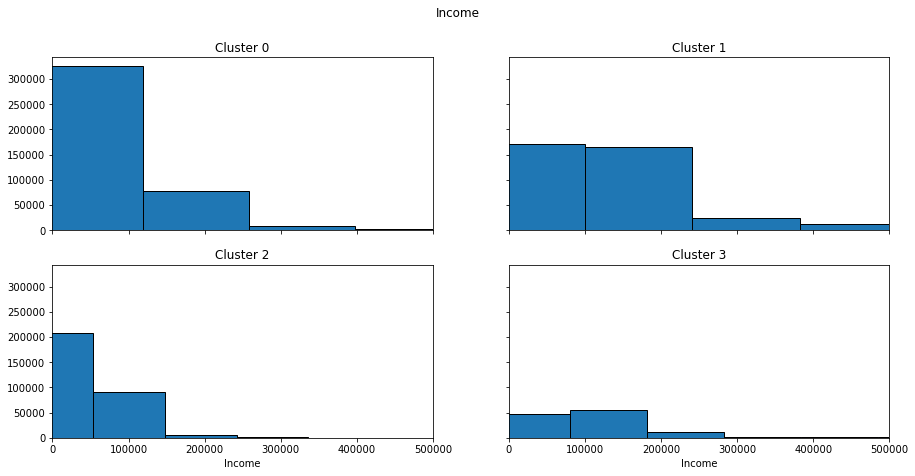

In [47]:
#Com
fig, axs = plt.subplots(2, 2, sharex=True,sharey=True, figsize=(15,7))
fig.suptitle("Income")

axs[0, 0].hist(clust2010_0['HHINCOME'],bins=15,edgecolor = "black")
axs[0, 0].set_title('Cluster 0')
axs[0, 0].set_xlim([0, 500000])
axs[0, 1].hist(clust2010_1['HHINCOME'],bins=15,edgecolor = "black")
axs[0, 1].set_title('Cluster 1')
axs[0, 1].set_xlim([0, 500000])
axs[1, 0].hist(clust2010_2['HHINCOME'],bins=15,edgecolor = "black")
axs[1, 0].set_title('Cluster 2')
axs[1, 0].set_xlim([0, 500000])
axs[1,0].set_xlabel('Income')
axs[1, 1].hist(clust2010_3['HHINCOME'],bins=15,edgecolor = "black")
axs[1, 1].set_title('Cluster 3')
axs[1, 1].set_xlim([0, 500000])
axs[1,1].set_xlabel('Income')

for ax in axs[2:]:
    ax.set(xlabel='Income')

<AxesSubplot:>

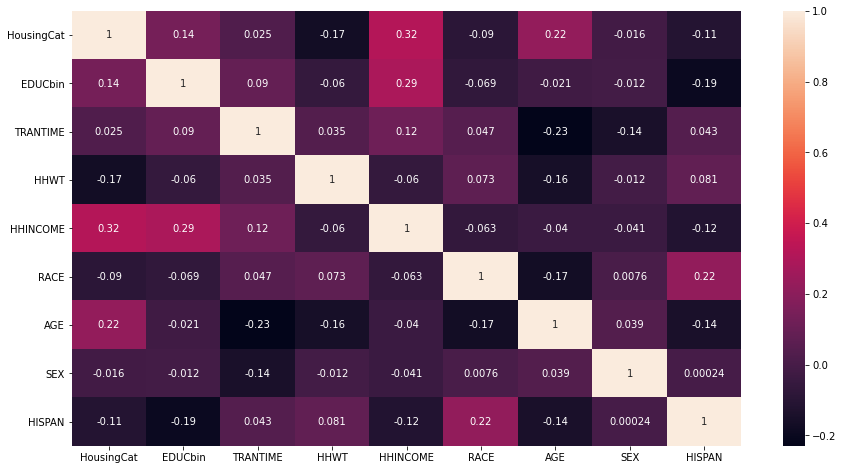

In [48]:
Xcorr10=dfX10fin.iloc[:, [0,1,2,3,4,5,6,7,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr10.corr(), annot = True)


# 2000

In [49]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX00.iloc[:,0:3])
X00fin = scaler.inverse_transform(dfX00)
dfX00fin = pd.DataFrame(X00fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX00fin['labels'] = kmeans.labels_
cluster_sum00 = dfX00fin.groupby(by = 'labels').mean()
cluster_sum00.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,9.552195,19.452120,72501.662914,2.645157,50.562585,1.548115,52.861837,0.461594
1,1.766062,1.000000,15.008891,20.049809,110868.113690,2.202240,46.303897,1.501485,54.308015,0.171414
2,0.532048,0.095235,10.468938,20.373155,49265.692795,3.343399,40.657700,1.525789,51.699441,0.696424
3,1.549440,0.375000,80.903810,20.257028,89374.402053,2.733913,40.906761,1.370745,50.977984,0.471149


In [50]:
#median table
round(dfX00fin.groupby(by = 'labels').median(),2)

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.0,0.0,0.0,19.0,56200.0,1.0,49.0,2.0,59.0,0.0
1,2.0,1.0,15.0,19.0,84000.0,1.0,45.0,2.0,59.0,0.0
2,1.0,0.0,2.0,21.0,31000.0,1.0,37.0,2.0,37.0,0.0
3,2.0,0.0,60.0,21.0,69600.0,1.0,40.0,1.0,47.0,0.0


In [51]:
#seperate Clusters
clust2000_0 = dfX00fin[dfX00fin['labels']==0]
clust2000_1 = dfX00fin[dfX00fin['labels']==1]
clust2000_2 = dfX00fin[dfX00fin['labels']==2]
clust2000_3 = dfX00fin[dfX00fin['labels']==3]

In [52]:

clust0size2000=clust2000_0.HHWT.sum()/dfX00fin.HHWT.sum()
clust1size2000=clust2000_1.HHWT.sum()/dfX00fin.HHWT.sum()
clust2size2000=clust2000_2.HHWT.sum()/dfX00fin.HHWT.sum()
clust3size2000=clust2000_3.HHWT.sum()/dfX00fin.HHWT.sum()

i=0
for x in [clust0size2000,clust1size2000,clust2size2000,clust3size2000]:
    print("Cluster",i,"-",(x*100).astype(int),"% of total")
    i+=1

Cluster 0 - 35 % of total
Cluster 1 - 27 % of total
Cluster 2 - 30 % of total
Cluster 3 - 6 % of total


## Incorperate Household Weights 


In [53]:
hhTotal0_2000=clust2000_0['HHWT'].sum()
hhTotal1_2000=clust2000_1['HHWT'].sum()
hhTotal2_2000=clust2000_2['HHWT'].sum()
hhTotal3_2000=clust2000_3['HHWT'].sum()

In [54]:
clust2000_0['RowWt'] = clust2000_0['HHWT']/hhTotal0_2000
clust2000_1['RowWt'] = clust2000_1['HHWT']/hhTotal1_2000
clust2000_2['RowWt'] = clust2000_2['HHWT']/hhTotal2_2000
clust2000_3['RowWt'] = clust2000_3['HHWT']/hhTotal3_2000

<ipython-input-54-3b9a63a65a09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust2000_0['RowWt'] = clust2000_0['HHWT']/hhTotal0_2000
<ipython-input-54-3b9a63a65a09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust2000_1['RowWt'] = clust2000_1['HHWT']/hhTotal1_2000
<ipython-input-54-3b9a63a65a09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

## Housing Category


In [55]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfHousing_2000 = pd.DataFrame(index=clustNames, data=np.array([[clust2000_0.loc[clust2000_0['HousingCat']==0].RowWt.sum(),
                                                     clust2000_0.loc[clust2000_0['HousingCat']==1].RowWt.sum(),
                                                     clust2000_0.loc[clust2000_0['HousingCat']==2].RowWt.sum()], 
                                                    [clust2000_1.loc[clust2000_1['HousingCat']==0].RowWt.sum(),
                                                     clust2000_1.loc[clust2000_1['HousingCat']==1].RowWt.sum(),
                                                     clust2000_1.loc[clust2000_1['HousingCat']==2].RowWt.sum()],
                                                    [clust2000_2.loc[clust2000_2['HousingCat']==0].RowWt.sum(),
                                                     clust2000_2.loc[clust2000_2['HousingCat']==1].RowWt.sum(),
                                                     clust2000_2.loc[clust2000_2['HousingCat']==2].RowWt.sum()],
                                                    [clust2000_3.loc[clust2000_3['HousingCat']==0].RowWt.sum(),
                                                     clust2000_3.loc[clust2000_3['HousingCat']==1].RowWt.sum(),
                                                     clust2000_3.loc[clust2000_3['HousingCat']==2].RowWt.sum()],
                                                    ]),
                   columns=['>=30% Income on Rent', '<30% Income on Rent', 'Owner'])
dfHousing_2000


,>=30% Income on Rent,<30% Income on Rent,Owner
Cluster 0,0.00000,0.000000,1.000000
Cluster 1,0.00000,0.246728,0.753272
Cluster 2,0.47300,0.527000,0.000000
Cluster 3,0.09829,0.262966,0.638743


## Education (binary)


In [56]:
#Education Binary Table 
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfEDU_2000 = pd.DataFrame(index=clustNames, data=np.array([[clust2000_0.loc[clust2000_0['EDUCbin']==0].RowWt.sum(),
                                                     clust2000_0.loc[clust2000_0['EDUCbin']==1].RowWt.sum()], 
                                                    [clust2000_1.loc[clust2000_1['EDUCbin']==0].RowWt.sum(),
                                                     clust2000_1.loc[clust2000_1['EDUCbin']==1].RowWt.sum()],
                                                    [clust2000_2.loc[clust2000_2['EDUCbin']==0].RowWt.sum(),
                                                     clust2000_2.loc[clust2000_2['EDUCbin']==1].RowWt.sum()],
                                                    [clust2000_3.loc[clust2000_3['EDUCbin']==0].RowWt.sum(),
                                                     clust2000_3.loc[clust2000_3['EDUCbin']==1].RowWt.sum(),
                                                    ]]),
                   columns=['<2 yr. College', '>2 yr. College'])
dfEDU_2000


,<2 yr. College,>2 yr. College
Cluster 0,1.000000,0.000000
Cluster 1,0.000000,1.000000
Cluster 2,0.901389,0.098611
Cluster 3,0.622322,0.377678


## Commute Time 


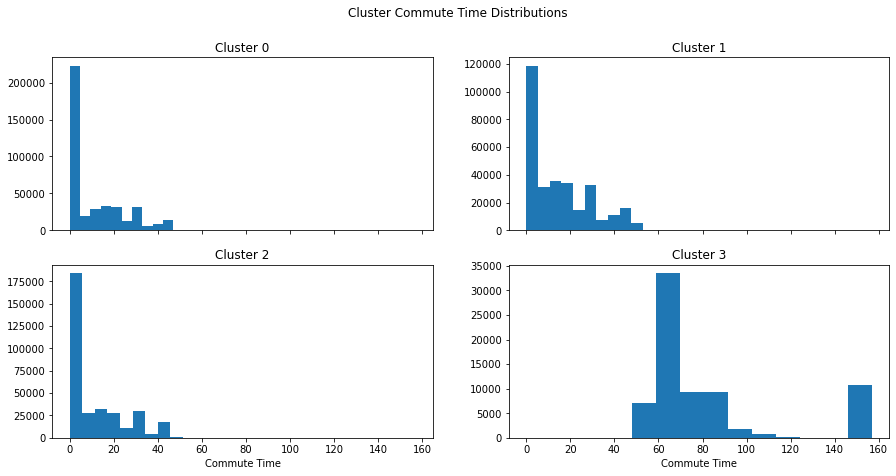

In [57]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15,7))
fig.suptitle("Cluster Commute Time Distributions")

axs[0, 0].hist(clust2000_0['TRANTIME'])
axs[0, 0].set_title('Cluster 0')
axs[0, 1].hist(clust2000_1['TRANTIME'])
axs[0, 1].set_title('Cluster 1')
axs[1, 0].hist(clust2000_2['TRANTIME'])
axs[1, 0].set_title('Cluster 2')
axs[1,0].set_xlabel('Commute Time')
axs[1, 1].hist(clust2000_3['TRANTIME'])
axs[1, 1].set_title('Cluster 3')
axs[1,1].set_xlabel('Commute Time')


for ax in axs[2:]:
    axs.set(xlabel='Commute Time (Minutes)')

# Demographics


## Race


In [58]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfR00 = pd.DataFrame(index=clustNames, data=np.array([[clust2000_0.loc[clust2000_0['RACE']==1].RowWt.sum(),clust2000_0.loc[clust2000_0['RACE']==2].RowWt.sum(),clust2000_0.loc[clust2000_0['RACE']==3].RowWt.sum(),
                                                    clust2000_0.loc[clust2000_0['RACE']==4].RowWt.sum(),clust2000_0.loc[clust2000_0['RACE']==5].RowWt.sum(),clust2000_0.loc[clust2000_0['RACE']==6].RowWt.sum(),
                                                    clust2000_0.loc[clust2000_0['RACE']==7].RowWt.sum(),clust2000_0.loc[clust2000_0['RACE']==8].RowWt.sum(),clust2000_0.loc[clust2000_0['RACE']==9].RowWt.sum()], 
                                                    [clust2000_1.loc[clust2000_1['RACE']==1].RowWt.sum(),clust2000_1.loc[clust2000_1['RACE']==2].RowWt.sum(),clust2000_1.loc[clust2000_1['RACE']==3].RowWt.sum(),
                                                    clust2000_1.loc[clust2000_1['RACE']==4].RowWt.sum(),clust2000_1.loc[clust2000_1['RACE']==5].RowWt.sum(),clust2000_1.loc[clust2000_1['RACE']==6].RowWt.sum(),
                                                    clust2000_1.loc[clust2000_1['RACE']==7].RowWt.sum(),clust2000_1.loc[clust2000_1['RACE']==8].RowWt.sum(),clust2000_1.loc[clust2000_1['RACE']==9].RowWt.sum()],
                                                    [clust2000_2.loc[clust2000_2['RACE']==1].RowWt.sum(),clust2000_2.loc[clust2000_2['RACE']==2].RowWt.sum(),clust2000_2.loc[clust2000_2['RACE']==3].RowWt.sum(),
                                                    clust2000_2.loc[clust2000_2['RACE']==4].RowWt.sum(),clust2000_2.loc[clust2000_2['RACE']==5].RowWt.sum(),clust2000_2.loc[clust2000_2['RACE']==6].RowWt.sum(),
                                                    clust2000_2.loc[clust2000_2['RACE']==7].RowWt.sum(),clust2000_2.loc[clust2000_2['RACE']==8].RowWt.sum(),clust2000_2.loc[clust2000_2['RACE']==9].RowWt.sum()],
                                                    [clust2000_3.loc[clust2000_3['RACE']==1].RowWt.sum(),clust2000_3.loc[clust2000_3['RACE']==2].RowWt.sum(),clust2000_3.loc[clust2000_3['RACE']==3].RowWt.sum(),
                                                    clust2000_3.loc[clust2000_3['RACE']==4].RowWt.sum(),clust2000_3.loc[clust2000_3['RACE']==5].RowWt.sum(),clust2000_3.loc[clust2000_3['RACE']==6].RowWt.sum(),
                                                    clust2000_3.loc[clust2000_3['RACE']==7].RowWt.sum(),clust2000_3.loc[clust2000_3['RACE']==8].RowWt.sum(),clust2000_3.loc[clust2000_3['RACE']==9].RowWt.sum()]]),
    columns=['White','Black','Native American/Alaskan','Chinese','Japanese','Other Asian/Pac. Islander','Other Race','Two Major Races','Three +'])
dfR00                 

,White,Black,Native American/Alaskan,Chinese,Japanese,Other Asian/Pac. Islander,Other Race,Two Major Races,Three +
Cluster 0,0.662947,0.046749,0.009234,0.026528,0.009869,0.056866,0.150265,0.035964,0.001578
Cluster 1,0.716103,0.042631,0.004436,0.051389,0.017287,0.101703,0.037024,0.027462,0.001966
Cluster 2,0.521092,0.084403,0.011829,0.022318,0.006714,0.076870,0.224449,0.049991,0.002334
Cluster 3,0.621828,0.073211,0.008986,0.034597,0.009657,0.071215,0.138916,0.039283,0.002306


## Income

In [59]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfI2000 = pd.DataFrame(index=clustNames, data=np.array([[clust2000_0.loc[clust2000_0['HHINCOME']<50000].RowWt.sum(),
                                                     clust2000_0.loc[(clust2000_0['HHINCOME']>=50000) & (clust2000_0['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2000_0.loc[clust2000_0['HHINCOME']>=150000].RowWt.sum()], 
                                                    [clust2000_1.loc[clust2000_1['HHINCOME']<50000].RowWt.sum(),
                                                     clust2000_1.loc[(clust2000_1['HHINCOME']>=50000) & (clust2000_1['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2000_1.loc[clust2000_1['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust2000_2.loc[clust2000_2['HHINCOME']<50000].RowWt.sum(),
                                                     clust2000_2.loc[(clust2000_2['HHINCOME']>=50000) & (clust2000_2['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2000_2.loc[clust2000_2['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust2000_3.loc[clust2000_3['HHINCOME']<50000].RowWt.sum(),
                                                     clust2000_3.loc[(clust2000_3['HHINCOME']>=50000) & (clust2000_3['HHINCOME']<150000)].RowWt.sum(),
                                                     clust2000_3.loc[clust2000_3['HHINCOME']>=150000].RowWt.sum()]]),
                   columns=['< 50,000', '  50,000 - 150,000', '>=150,000'])
dfI2000

,"< 50,000","50,000 - 150,000",">=150,000"
Cluster 0,0.425268,0.503482,0.071250
Cluster 1,0.213574,0.601557,0.184869
Cluster 2,0.729117,0.253797,0.017087
Cluster 3,0.315586,0.578722,0.105691


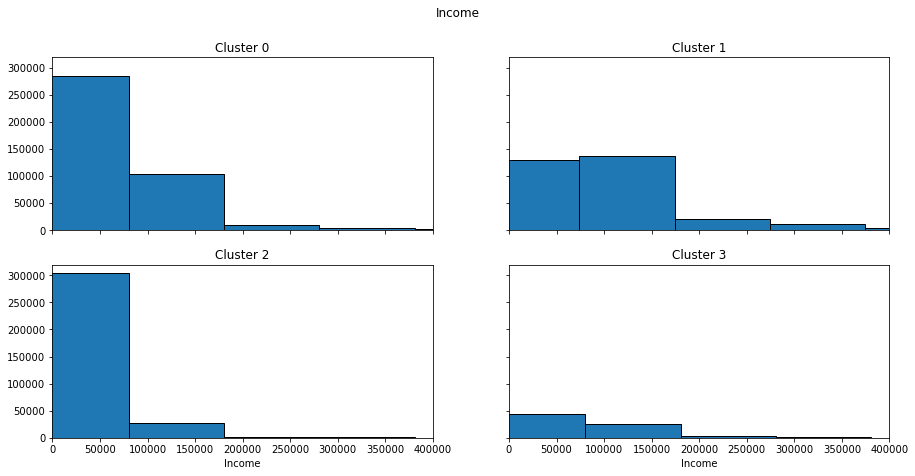

In [60]:
#Income
fig, axs = plt.subplots(2, 2, sharex=True,sharey=True, figsize=(15,7))
fig.suptitle("Income")

axs[0, 0].hist(clust2000_0['HHINCOME'],bins=100,edgecolor = "black")
axs[0, 0].set_title('Cluster 0')
axs[0, 0].set_xlim([0, 400000])
axs[0, 1].hist(clust2000_1['HHINCOME'],bins=100,edgecolor = "black")
axs[0, 1].set_title('Cluster 1')
axs[0, 1].set_xlim([0, 40000])
axs[1, 0].hist(clust2000_2['HHINCOME'],bins=100,edgecolor = "black")
axs[1, 0].set_title('Cluster 2')
axs[1, 0].set_xlim([0, 400000])
axs[1,0].set_xlabel('Income')
axs[1, 1].hist(clust2000_3['HHINCOME'],bins=100,edgecolor = "black")
axs[1, 1].set_title('Cluster 3')
axs[1, 1].set_xlim([0, 400000])
axs[1,1].set_xlabel('Income')

for ax in axs[2:]:
    ax.set(xlabel='Income')

<AxesSubplot:>

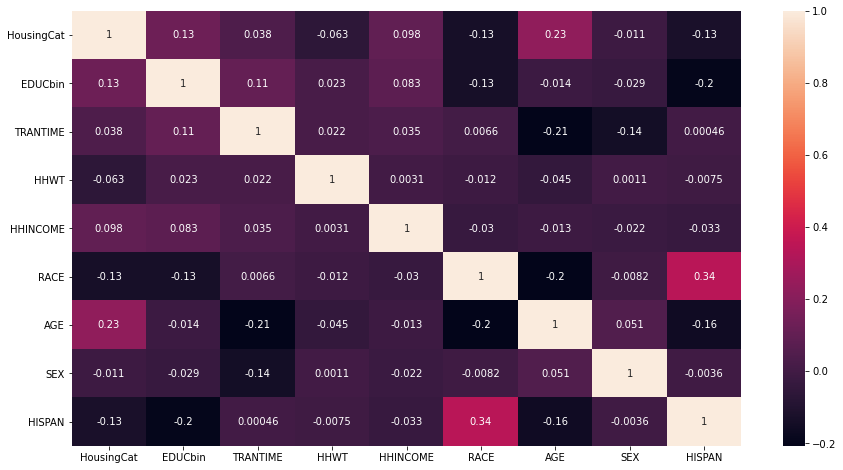

In [61]:
Xcorr00=dfX00fin.iloc[:, [0,1,2,3,4,5,6,7,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr00.corr(), annot = True)


### 1990

In [62]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(dfX90.iloc[:,0:3])
X90fin = scaler.inverse_transform(dfX90)
dfX90fin = pd.DataFrame(X90fin, columns=['HousingCat','EDUCbin','TRANTIME','HHWT','HHINCOME','RACE','AGE','SEX','COUNTYFIP','HISPAN'])
dfX90fin['labels'] = kmeans.labels_
cluster_sum90 = dfX90fin.groupby(by = 'labels').mean()
cluster_sum90.head(5)


,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.000000,0.000000,8.200154,19.382852,50344.338479,1.968691,50.362844,1.569326,52.958754,0.295185
1,1.770943,1.000000,15.426928,19.976285,71433.732782,1.765125,43.500383,1.478019,53.937945,0.146629
2,0.500794,0.093987,10.423392,21.640624,29715.600988,2.640184,39.138719,1.533481,52.118339,0.538956
3,1.602153,0.271089,59.800477,20.401737,59819.405186,2.189663,39.122303,1.352164,51.615530,0.392465


In [63]:
#median table
round(dfX90fin.groupby(by = 'labels').median(),2)

,HousingCat,EDUCbin,TRANTIME,HHWT,HHINCOME,RACE,AGE,SEX,COUNTYFIP,HISPAN
labels,,,,,,,,,,
0,2.0,0.0,0.0,18.0,42854.0,1.0,50.0,2.0,59.0,0.0
1,2.0,1.0,15.0,18.0,60000.0,1.0,41.0,1.0,59.0,0.0
2,1.0,0.0,5.0,21.0,25000.0,1.0,34.0,2.0,41.0,0.0
3,2.0,0.0,60.0,19.0,52000.0,1.0,37.0,1.0,41.0,0.0


In [64]:
#seperate Clusters
clust1990_0 = dfX90fin[dfX90fin['labels']==0]
clust1990_1 = dfX90fin[dfX90fin['labels']==1]
clust1990_2 = dfX90fin[dfX90fin['labels']==2]
clust1990_3 = dfX90fin[dfX90fin['labels']==3]

In [65]:

clust0size1990=clust1990_0.HHWT.sum()/dfX90fin.HHWT.sum()
clust1size1990=clust1990_1.HHWT.sum()/dfX90fin.HHWT.sum()
clust2size1990=clust1990_2.HHWT.sum()/dfX90fin.HHWT.sum()
clust3size1990=clust1990_3.HHWT.sum()/dfX90fin.HHWT.sum()

i=0
for x in [clust0size1990,clust1size1990,clust2size1990,clust3size1990]:
    print("Cluster",i,"-",(x*100).astype(int),"% of total")
    i+=1

Cluster 0 - 34 % of total
Cluster 1 - 24 % of total
Cluster 2 - 31 % of total
Cluster 3 - 9 % of total


## Incorperate Household Weights 


In [66]:
hhTotal0_1990=clust1990_0['HHWT'].sum()
hhTotal1_1990=clust1990_1['HHWT'].sum()
hhTotal2_1990=clust1990_2['HHWT'].sum()
hhTotal3_1990=clust1990_3['HHWT'].sum()

In [67]:
clust1990_0['RowWt'] = clust1990_0['HHWT']/hhTotal0_1990
clust1990_1['RowWt'] = clust1990_1['HHWT']/hhTotal1_1990
clust1990_2['RowWt'] = clust1990_2['HHWT']/hhTotal2_1990
clust1990_3['RowWt'] = clust1990_3['HHWT']/hhTotal3_1990

<ipython-input-67-981aa8c16a8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust1990_0['RowWt'] = clust1990_0['HHWT']/hhTotal0_1990
<ipython-input-67-981aa8c16a8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clust1990_1['RowWt'] = clust1990_1['HHWT']/hhTotal1_1990
<ipython-input-67-981aa8c16a8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

## Housing Category


In [68]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfHousing_1990 = pd.DataFrame(index=clustNames, data=np.array([[clust1990_0.loc[clust1990_0['HousingCat']==0].RowWt.sum(),
                                                     clust1990_0.loc[clust1990_0['HousingCat']==1].RowWt.sum(),
                                                     clust1990_0.loc[clust1990_0['HousingCat']==2].RowWt.sum()], 
                                                    [clust1990_1.loc[clust1990_1['HousingCat']==0].RowWt.sum(),
                                                     clust1990_1.loc[clust1990_1['HousingCat']==1].RowWt.sum(),
                                                     clust1990_1.loc[clust1990_1['HousingCat']==2].RowWt.sum()],
                                                    [clust1990_2.loc[clust1990_2['HousingCat']==0].RowWt.sum(),
                                                     clust1990_2.loc[clust1990_2['HousingCat']==1].RowWt.sum(),
                                                     clust1990_2.loc[clust1990_2['HousingCat']==2].RowWt.sum()],
                                                    [clust1990_3.loc[clust1990_3['HousingCat']==0].RowWt.sum(),
                                                     clust1990_3.loc[clust1990_3['HousingCat']==1].RowWt.sum(),
                                                     clust1990_3.loc[clust1990_3['HousingCat']==2].RowWt.sum()],
                                                    ]),
                   columns=['>=30% Income on Rent', '<30% Income on Rent', 'Owner'])
dfHousing_1990


,>=30% Income on Rent,<30% Income on Rent,Owner
Cluster 0,0.000000,0.000000,1.000000
Cluster 1,0.000000,0.253056,0.746944
Cluster 2,0.508651,0.491349,0.000000
Cluster 3,0.073815,0.280394,0.645791


## Education (binary)


In [69]:
#Education Binary Table 
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3',]
dfEDU_1990 = pd.DataFrame(index=clustNames, data=np.array([[clust1990_0.loc[clust1990_0['EDUCbin']==0].RowWt.sum(),
                                                     clust1990_0.loc[clust1990_0['EDUCbin']==1].RowWt.sum()], 
                                                    [clust1990_1.loc[clust1990_1['EDUCbin']==0].RowWt.sum(),
                                                     clust1990_1.loc[clust1990_1['EDUCbin']==1].RowWt.sum()],
                                                    [clust1990_2.loc[clust1990_2['EDUCbin']==0].RowWt.sum(),
                                                     clust1990_2.loc[clust1990_2['EDUCbin']==1].RowWt.sum()],
                                                    [clust1990_3.loc[clust1990_3['EDUCbin']==0].RowWt.sum(),
                                                     clust1990_3.loc[clust1990_3['EDUCbin']==1].RowWt.sum(),
                                                    ]]),
                   columns=['<2 yr. College', '>2 yr. College'])
dfEDU_1990


,<2 yr. College,>2 yr. College
Cluster 0,1.000000,0.000000
Cluster 1,0.000000,1.000000
Cluster 2,0.901996,0.098004
Cluster 3,0.730156,0.269844


## Commute Time 


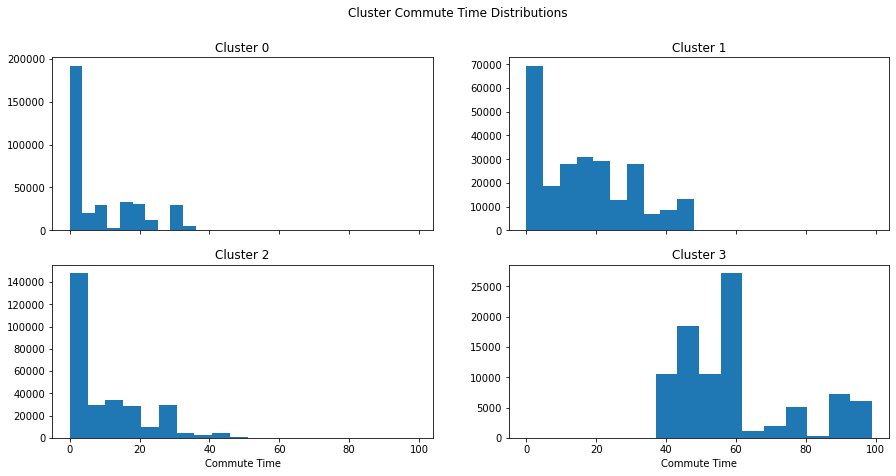

In [70]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(15,7))
fig.suptitle("Cluster Commute Time Distributions")

axs[0, 0].hist(clust1990_0['TRANTIME'])
axs[0, 0].set_title('Cluster 0')
axs[0, 1].hist(clust1990_1['TRANTIME'])
axs[0, 1].set_title('Cluster 1')
axs[1, 0].hist(clust1990_2['TRANTIME'])
axs[1, 0].set_title('Cluster 2')
axs[1,0].set_xlabel('Commute Time')
axs[1, 1].hist(clust1990_3['TRANTIME'])
axs[1, 1].set_title('Cluster 3')
axs[1,1].set_xlabel('Commute Time')


for ax in axs[2:]:
    axs.set(xlabel='Commute Time (Minutes)')

# Demographics


## Race


In [71]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfR90 = pd.DataFrame(index=clustNames, data=np.array([[clust1990_0.loc[clust1990_0['RACE']==1].RowWt.sum(),clust1990_0.loc[clust1990_0['RACE']==2].RowWt.sum(),clust1990_0.loc[clust1990_0['RACE']==3].RowWt.sum(),
                                                    clust1990_0.loc[clust1990_0['RACE']==4].RowWt.sum(),clust1990_0.loc[clust1990_0['RACE']==5].RowWt.sum(),clust1990_0.loc[clust1990_0['RACE']==6].RowWt.sum(),
                                                    clust1990_0.loc[clust1990_0['RACE']==7].RowWt.sum(),clust1990_0.loc[clust1990_0['RACE']==8].RowWt.sum(),clust1990_0.loc[clust1990_0['RACE']==9].RowWt.sum()], 
                                                    [clust1990_1.loc[clust1990_1['RACE']==1].RowWt.sum(),clust1990_1.loc[clust1990_1['RACE']==2].RowWt.sum(),clust1990_1.loc[clust1990_1['RACE']==3].RowWt.sum(),
                                                    clust1990_1.loc[clust1990_1['RACE']==4].RowWt.sum(),clust1990_1.loc[clust1990_1['RACE']==5].RowWt.sum(),clust1990_1.loc[clust1990_1['RACE']==6].RowWt.sum(),
                                                    clust1990_1.loc[clust1990_1['RACE']==7].RowWt.sum(),clust1990_1.loc[clust1990_1['RACE']==8].RowWt.sum(),clust1990_1.loc[clust1990_1['RACE']==9].RowWt.sum()],
                                                    [clust1990_2.loc[clust1990_2['RACE']==1].RowWt.sum(),clust1990_2.loc[clust1990_2['RACE']==2].RowWt.sum(),clust1990_2.loc[clust1990_2['RACE']==3].RowWt.sum(),
                                                    clust1990_2.loc[clust1990_2['RACE']==4].RowWt.sum(),clust1990_2.loc[clust1990_2['RACE']==5].RowWt.sum(),clust1990_2.loc[clust1990_2['RACE']==6].RowWt.sum(),
                                                    clust1990_2.loc[clust1990_2['RACE']==7].RowWt.sum(),clust1990_2.loc[clust1990_2['RACE']==8].RowWt.sum(),clust1990_2.loc[clust1990_2['RACE']==9].RowWt.sum()],
                                                    [clust1990_3.loc[clust1990_3['RACE']==1].RowWt.sum(),clust1990_3.loc[clust1990_3['RACE']==2].RowWt.sum(),clust1990_3.loc[clust1990_3['RACE']==3].RowWt.sum(),
                                                    clust1990_3.loc[clust1990_3['RACE']==4].RowWt.sum(),clust1990_3.loc[clust1990_3['RACE']==5].RowWt.sum(),clust1990_3.loc[clust1990_3['RACE']==6].RowWt.sum(),
                                                    clust1990_3.loc[clust1990_3['RACE']==7].RowWt.sum(),clust1990_3.loc[clust1990_3['RACE']==8].RowWt.sum(),clust1990_3.loc[clust1990_3['RACE']==9].RowWt.sum()]]),
    columns=['White','Black','Native American/Alaskan','Chinese','Japanese','Other Asian/Pac. Islander','Other Race','Two Major Races','Three +'])
dfR90                 

,White,Black,Native American/Alaskan,Chinese,Japanese,Other Asian/Pac. Islander,Other Race,Two Major Races,Three +
Cluster 0,0.771173,0.051975,0.007962,0.021038,0.012137,0.040602,0.095114,0.0,0.0
Cluster 1,0.794990,0.045992,0.004690,0.036316,0.018717,0.069666,0.029629,0.0,0.0
Cluster 2,0.628306,0.093255,0.010444,0.019087,0.007705,0.062350,0.178854,0.0,0.0
Cluster 3,0.713736,0.069779,0.008111,0.026575,0.011306,0.056308,0.114186,0.0,0.0


## Income

In [72]:
clustNames= ['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3']
dfI1990 = pd.DataFrame(index=clustNames, data=np.array([[clust1990_0.loc[clust1990_0['HHINCOME']<50000].RowWt.sum(),
                                                     clust1990_0.loc[(clust1990_0['HHINCOME']>=50000) & (clust1990_0['HHINCOME']<150000)].RowWt.sum(),
                                                     clust1990_0.loc[clust1990_0['HHINCOME']>=150000].RowWt.sum()], 
                                                    [clust1990_1.loc[clust1990_1['HHINCOME']<50000].RowWt.sum(),
                                                     clust1990_1.loc[(clust1990_1['HHINCOME']>=50000) & (clust1990_1['HHINCOME']<150000)].RowWt.sum(),
                                                     clust1990_1.loc[clust1990_1['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust1990_2.loc[clust1990_2['HHINCOME']<50000].RowWt.sum(),
                                                     clust1990_2.loc[(clust1990_2['HHINCOME']>=50000) & (clust1990_2['HHINCOME']<150000)].RowWt.sum(),
                                                     clust1990_2.loc[clust1990_2['HHINCOME']>=150000].RowWt.sum()],
                                                    [clust1990_3.loc[clust1990_3['HHINCOME']<50000].RowWt.sum(),
                                                     clust1990_3.loc[(clust1990_3['HHINCOME']>=50000) & (clust1990_3['HHINCOME']<150000)].RowWt.sum(),
                                                     clust1990_3.loc[clust1990_3['HHINCOME']>=150000].RowWt.sum()]]),
                   columns=['< 50,000', '  50,000 - 150,000', '>=150,000'])
dfI1990

,"< 50,000","50,000 - 150,000",">=150,000"
Cluster 0,0.592884,0.384253,0.022863
Cluster 1,0.377568,0.562249,0.060183
Cluster 2,0.854680,0.142613,0.002708
Cluster 3,0.474129,0.498917,0.026954


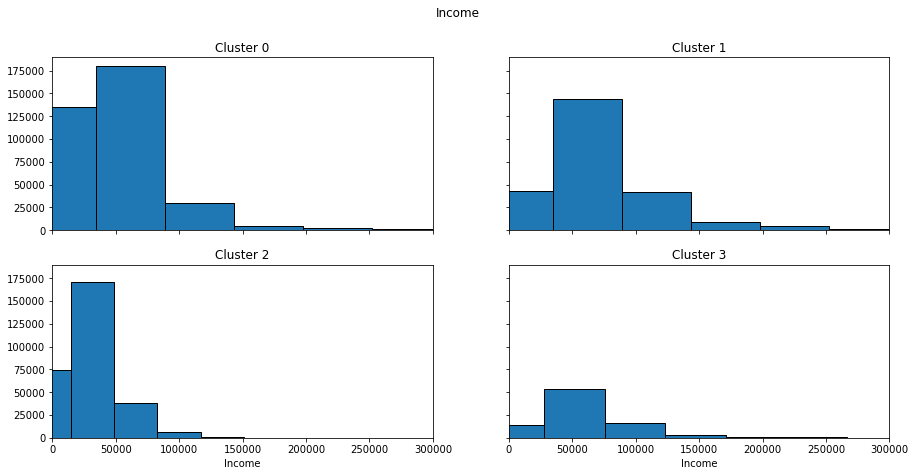

In [73]:
#Income
fig, axs = plt.subplots(2, 2, sharex=True,sharey=True, figsize=(15,7))
fig.suptitle("Income")

axs[0, 0].hist(clust1990_0['HHINCOME'],bins=15,edgecolor = "black")
axs[0, 0].set_title('Cluster 0')
axs[0, 0].set_xlim([0, 300000])
axs[0, 1].hist(clust1990_1['HHINCOME'],bins=15,edgecolor = "black")
axs[0, 1].set_title('Cluster 1')
axs[0, 1].set_xlim([0, 300000])
axs[1, 0].hist(clust1990_2['HHINCOME'],bins=15,edgecolor = "black")
axs[1, 0].set_title('Cluster 2')
axs[1, 0].set_xlim([0, 300000])
axs[1,0].set_xlabel('Income')
axs[1, 1].hist(clust1990_3['HHINCOME'],bins=15,edgecolor = "black")
axs[1, 1].set_title('Cluster 3')
axs[1, 1].set_xlim([0, 300000])
axs[1,1].set_xlabel('Income')

for ax in axs[2:]:
    ax.set(xlabel='Income')

<AxesSubplot:>

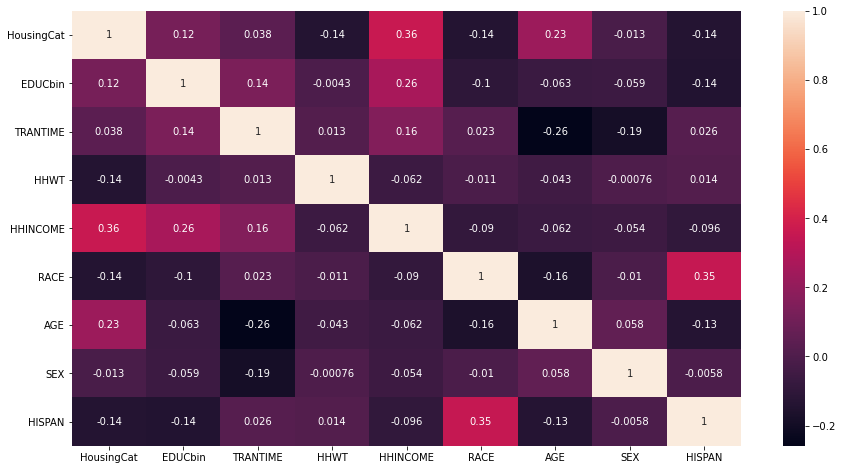

In [74]:
Xcorr90=dfX90fin.iloc[:, [0,1,2,3,4,5,6,7,9]]
plt.subplots(figsize=(15,8))
sns.heatmap(Xcorr90.corr(), annot = True)


## Geographic Grouping

In [75]:
#import County Geographies
import geopandas as gpd
countygeo=gpd.read_file("C:/Users/Aren Kabarajian/Documents/NYU_CUSP/Capstone/ca-county-boundaries/CA_Counties/CA_Counties_TIGER2016.shp")
countygeo.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [76]:
def GEOIDfunc(geoid):
    if len(geoid)==1:
        geoid='0600'+geoid
    elif len(geoid)==2:
        geoid='060'+geoid
    elif len(geoid)==3:
        geoid='06'+geoid
    else:
        pass
    return geoid

In [77]:
#Prepare for geographies - aggregate by cluster and FIP Code - count of persons, sum of weight
df10geo = dfX10fin[['COUNTYFIP','EDUCbin','HHWT','labels']].groupby(['COUNTYFIP','labels']).agg({'EDUCbin' : ['count'], 'HHWT' : ['sum']}).copy()


In [78]:
#Multiply by Household weight 
df10geo = (df10geo['HHWT']/df10geo['HHWT'].sum())*df10geo['EDUCbin'].values

In [79]:
#Label pop accordingly
df10geo.columns = ['Weighted_pop']

In [80]:
#reindex
df10geo.reset_index(inplace=True)

In [81]:
#format for merging
df10geo['COUNTYFIP'] = pd.Series(df10geo['COUNTYFIP'], dtype="int")
df10geo['COUNTYFIP'] = pd.Series(df10geo['COUNTYFIP'], dtype="string")
df10geo['Weighted_pop'] = pd.Series(df10geo['Weighted_pop'], dtype="int")


In [82]:
df10geo.dtypes

COUNTYFIP       string
labels           int64
Weighted_pop     int32
dtype: object

In [83]:
#add geocode formatting
df10geo['GEOID'] = df10geo.apply(lambda x: GEOIDfunc(x['COUNTYFIP']), axis=1)

In [84]:
#sort, get total pop by county, create percent variable 
df10geo = df10geo.sort_values('GEOID')
df10sum = df10geo[['Weighted_pop','GEOID']].groupby('GEOID').sum()
df10sum.columns = ['County_pop']
df10sum = df10sum.reset_index()
df10geo = df10geo.merge(df10sum,how='right')
df10geo['perc_pop'] = round(df10geo['Weighted_pop']/df10geo['County_pop'],2)
df10geo

,COUNTYFIP,labels,Weighted_pop,GEOID,County_pop,perc_pop
0,0,0,312,06000,555,0.56
1,0,1,117,06000,555,0.21
2,0,2,116,06000,555,0.21
3,0,3,10,06000,555,0.02
4,1,0,149,06001,587,0.25
...,...,...,...,...,...,...
135,111,3,5,06111,178,0.03
136,113,2,3,06113,9,0.33
137,113,0,2,06113,9,0.22
138,113,1,4,06113,9,0.44


In [85]:
#create dataframes for each cluster
cluster0_2010 = df10geo[(df10geo['labels'] == 0)]
cluster1_2010 = df10geo[(df10geo['labels'] == 1)]
cluster2_2010 = df10geo[(df10geo['labels'] == 2)]
cluster3_2010 = df10geo[(df10geo['labels'] == 3)]


In [86]:
#merge in county geography for plotting 
cluster0_2010_geo=countygeo.merge(cluster0_2010,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster1_2010_geo=countygeo.merge(cluster1_2010,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster2_2010_geo=countygeo.merge(cluster2_2010,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster3_2010_geo=countygeo.merge(cluster3_2010,left_index=True, right_index=True, how='left', suffixes=['','_norm'])


C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


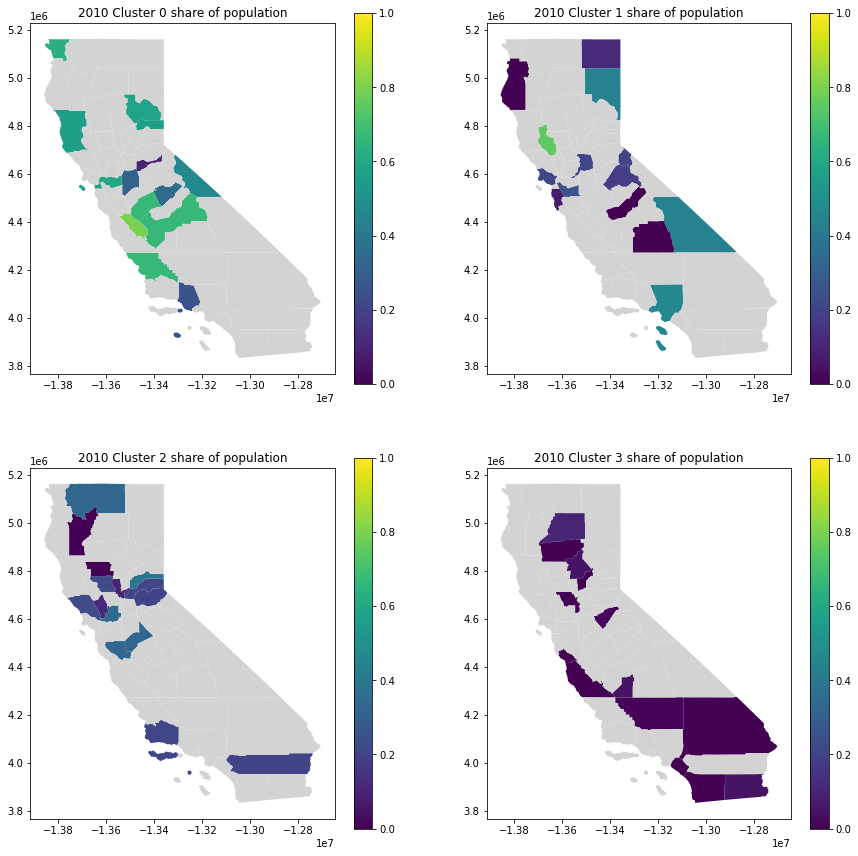

In [87]:
#plot maps - make regions with 0 % grey
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1 = cluster0_2010_geo.plot(axes=ax1,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 0 share of population')
ax2 = fig.add_subplot(2,2,2)
ax2 = cluster1_2010_geo.plot(axes=ax2,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 1 share of population')
ax3 = fig.add_subplot(2,2,3)
ax3 = cluster2_2010_geo.plot(axes=ax3,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 2 share of population')
ax4 = fig.add_subplot(2,2,4)
ax4 = cluster3_2010_geo.plot(axes=ax4,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 3 share of population')
plt.show()


In [88]:
#Prepare for geographies - aggregate by cluster and FIP Code - count of persons, sum of weight
df19geo = dfX19fin[['COUNTYFIP','EDUCbin','HHWT','labels']].groupby(['COUNTYFIP','labels']).agg({'EDUCbin' : ['count'], 'HHWT' : ['sum']}).copy()
#Multiply by Household weight 
df19geo = (df19geo['HHWT']/df19geo['HHWT'].sum())*df19geo['EDUCbin'].values
#Label pop accordingly
df19geo.columns = ['Weighted_pop']
#reindex
df19geo.reset_index(inplace=True)
#format for merging
df19geo['COUNTYFIP'] = pd.Series(df19geo['COUNTYFIP'], dtype="int")
df19geo['COUNTYFIP'] = pd.Series(df19geo['COUNTYFIP'], dtype="string")
df19geo['Weighted_pop'] = pd.Series(df19geo['Weighted_pop'], dtype="int")
#add geocode formatting
df19geo['GEOID'] = df19geo.apply(lambda x: GEOIDfunc(x['COUNTYFIP']), axis=1)
#sort, get total pop by county, create percent variable 
df19geo = df19geo.sort_values('GEOID')
df19sum = df19geo[['Weighted_pop','GEOID']].groupby('GEOID').sum()
df19sum.columns = ['County_pop']
df19sum = df19sum.reset_index()
df19geo = df19geo.merge(df19sum,how='right')
df19geo['perc_pop'] = round(df19geo['Weighted_pop']/df10geo['County_pop'],2)
df19geo

,COUNTYFIP,labels,Weighted_pop,GEOID,County_pop,perc_pop
0,0,0,137,06000,627,0.25
1,0,1,36,06000,627,0.06
2,0,2,9,06000,627,0.02
3,0,3,445,06000,627,0.80
4,1,0,425,06001,801,0.72
...,...,...,...,...,...,...
135,111,3,110,06111,213,0.62
136,113,2,0,06113,10,0.00
137,113,0,5,06113,10,0.56
138,113,1,1,06113,10,0.11


In [89]:
#create dataframes for each cluster
cluster0_2019 = df19geo[(df19geo['labels'] == 0)]
cluster1_2019 = df19geo[(df19geo['labels'] == 1)]
cluster2_2019 = df19geo[(df19geo['labels'] == 2)]
cluster3_2019 = df19geo[(df19geo['labels'] == 3)]


In [90]:
#merge in county geography for plotting 
cluster0_2019_geo=countygeo.merge(cluster0_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster1_2019_geo=countygeo.merge(cluster1_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster2_2019_geo=countygeo.merge(cluster2_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster3_2019_geo=countygeo.merge(cluster3_2019,left_index=True, right_index=True, how='left', suffixes=['','_norm'])


C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


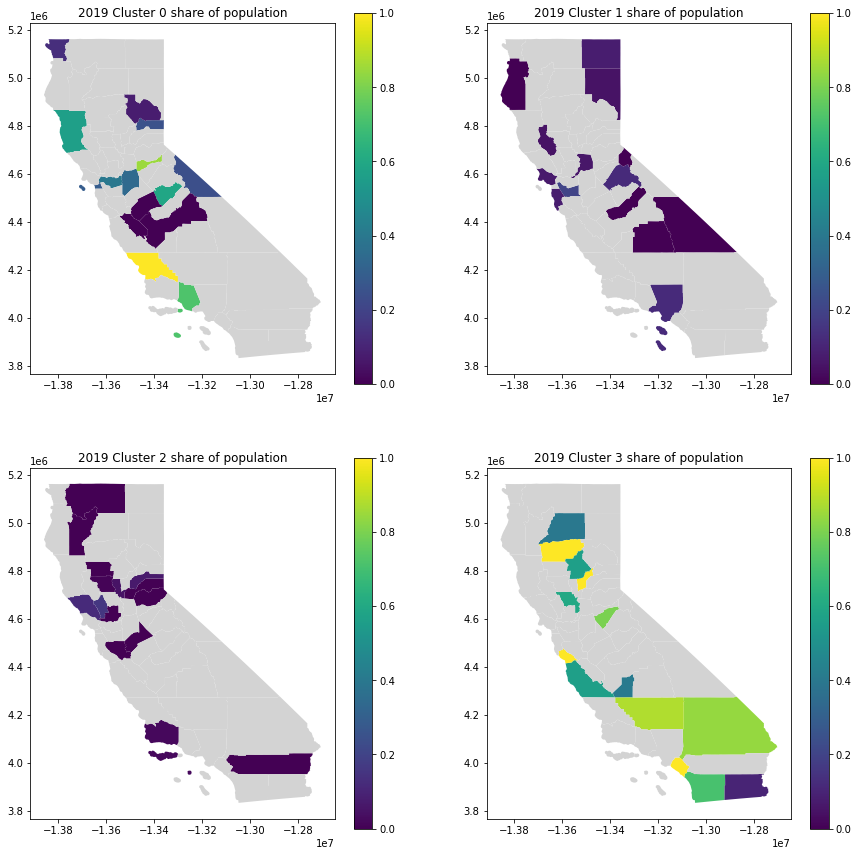

In [91]:
#plot maps - make regions with 0 % grey
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1 = cluster0_2019_geo.plot(axes=ax1,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 0 share of population')
ax2 = fig.add_subplot(2,2,2)
ax2 = cluster1_2019_geo.plot(axes=ax2,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 1 share of population')
ax3 = fig.add_subplot(2,2,3)
ax3 = cluster2_2019_geo.plot(axes=ax3,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 2 share of population')
ax4 = fig.add_subplot(2,2,4)
ax4 = cluster3_2019_geo.plot(axes=ax4,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 3 share of population')
plt.show()


In [92]:
#Prepare for geographies - aggregate by cluster and FIP Code - count of persons, sum of weight
df00geo = dfX00fin[['COUNTYFIP','EDUCbin','HHWT','labels']].groupby(['COUNTYFIP','labels']).agg({'EDUCbin' : ['count'], 'HHWT' : ['sum']}).copy()
#Multiply by Household weight 
df00geo = (df00geo['HHWT']/df00geo['HHWT'].sum())*df00geo['EDUCbin'].values
#Label pop accordingly
df00geo.columns = ['Weighted_pop']
#reindex
df00geo.reset_index(inplace=True)
#format for merging
df00geo['COUNTYFIP'] = pd.Series(df00geo['COUNTYFIP'], dtype="int")
df00geo['COUNTYFIP'] = pd.Series(df00geo['COUNTYFIP'], dtype="string")
df00geo['Weighted_pop'] = pd.Series(df00geo['Weighted_pop'], dtype="int")
#add geocode formatting
df00geo['GEOID'] = df00geo.apply(lambda x: GEOIDfunc(x['COUNTYFIP']), axis=1)
#sort, get total pop by county, create percent variable 
df00geo = df00geo.sort_values('GEOID')
df00sum = df00geo[['Weighted_pop','GEOID']].groupby('GEOID').sum()
df00sum.columns = ['County_pop']
df00sum = df00sum.reset_index()
df00geo = df00geo.merge(df00sum,how='right')
df00geo['perc_pop'] = round(df00geo['Weighted_pop']/df10geo['County_pop'],2)
df00geo


,COUNTYFIP,labels,Weighted_pop,GEOID,County_pop,perc_pop
0,0,0,380,06000,612,0.68
1,0,1,92,06000,612,0.17
2,0,2,135,06000,612,0.24
3,0,3,5,06000,612,0.01
4,1,0,204,06001,629,0.35
...,...,...,...,...,...,...
135,111,3,1,06111,171,0.01
136,113,2,3,06113,7,0.33
137,113,0,2,06113,7,0.22
138,113,1,2,06113,7,0.22


In [93]:
#create dataframes for each cluster
cluster0_2000 = df00geo[(df00geo['labels'] == 0)]
cluster1_2000 = df00geo[(df00geo['labels'] == 1)]
cluster2_2000 = df00geo[(df00geo['labels'] == 2)]
cluster3_2000 = df00geo[(df00geo['labels'] == 3)]


In [94]:
#merge in county geography for plotting 
cluster0_2000_geo=countygeo.merge(cluster0_2000,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster1_2000_geo=countygeo.merge(cluster1_2000,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster2_2000_geo=countygeo.merge(cluster2_2000,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster3_2000_geo=countygeo.merge(cluster3_2000,left_index=True, right_index=True, how='left', suffixes=['','_norm'])


C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


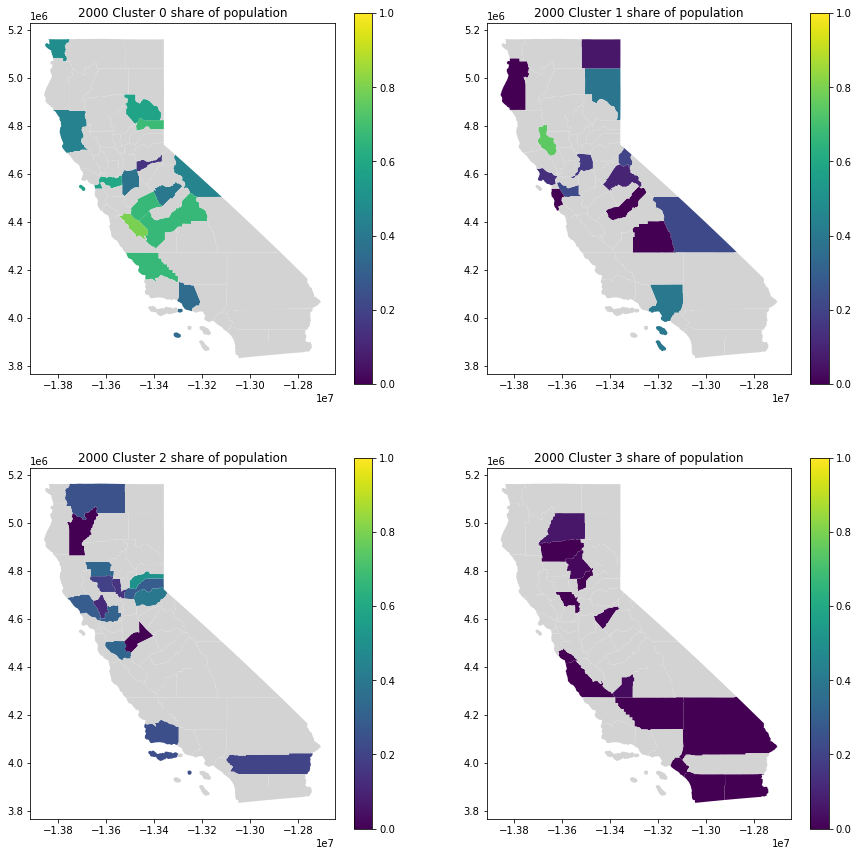

In [95]:
#plot maps - make regions with 0 % grey
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1 = cluster0_2000_geo.plot(axes=ax1,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 0 share of population')
ax2 = fig.add_subplot(2,2,2)
ax2 = cluster1_2000_geo.plot(axes=ax2,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 1 share of population')
ax3 = fig.add_subplot(2,2,3)
ax3 = cluster2_2000_geo.plot(axes=ax3,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 2 share of population')
ax4 = fig.add_subplot(2,2,4)
ax4 = cluster3_2000_geo.plot(axes=ax4,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 3 share of population')
plt.show()


In [96]:
#Prepare for geographies - aggregate by cluster and FIP Code - count of persons, sum of weight
df90geo = dfX90fin[['COUNTYFIP','EDUCbin','HHWT','labels']].groupby(['COUNTYFIP','labels']).agg({'EDUCbin' : ['count'], 'HHWT' : ['sum']}).copy()
#Multiply by Household weight 
df90geo = (df90geo['HHWT']/df90geo['HHWT'].sum())*df90geo['EDUCbin'].values
#Label pop accordingly
df90geo.columns = ['Weighted_pop']
#reindex
df90geo.reset_index(inplace=True)
#format for merging
df90geo['COUNTYFIP'] = pd.Series(df90geo['COUNTYFIP'], dtype="int")
df90geo['COUNTYFIP'] = pd.Series(df90geo['COUNTYFIP'], dtype="string")
df90geo['Weighted_pop'] = pd.Series(df90geo['Weighted_pop'], dtype="int")
#add geocode formatting
df90geo['GEOID'] = df90geo.apply(lambda x: GEOIDfunc(x['COUNTYFIP']), axis=1)
#sort, get total pop by county, create percent variable 
df90geo = df90geo.sort_values('GEOID')
df90sum = df90geo[['Weighted_pop','GEOID']].groupby('GEOID').sum()
df90sum.columns = ['County_pop']
df90sum = df90sum.reset_index()
df90geo = df90geo.merge(df90sum,how='right')
df90geo['perc_pop'] = round(df90geo['Weighted_pop']/df10geo['County_pop'],2)
df90geo


,COUNTYFIP,labels,Weighted_pop,GEOID,County_pop,perc_pop
0,0,0,223,06000,317,0.40
1,0,1,33,06000,317,0.06
2,0,2,58,06000,317,0.10
3,0,3,3,06000,317,0.01
4,1,0,202,06001,544,0.34
...,...,...,...,...,...,...
135,111,3,5,06111,138,0.03
136,113,2,2,06113,5,0.22
137,113,0,2,06113,5,0.22
138,113,1,1,06113,5,0.11


In [97]:
#create dataframes for each cluster
cluster0_1990 = df90geo[(df90geo['labels'] == 0)]
cluster1_1990 = df90geo[(df90geo['labels'] == 1)]
cluster2_1990 = df90geo[(df90geo['labels'] == 2)]
cluster3_1990 = df90geo[(df90geo['labels'] == 3)]


In [98]:
#merge in county geography for plotting 
cluster0_1990_geo=countygeo.merge(cluster0_1990,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster1_1990_geo=countygeo.merge(cluster1_1990,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster2_1990_geo=countygeo.merge(cluster2_1990,left_index=True, right_index=True, how='left', suffixes=['','_norm'])
cluster3_1990_geo=countygeo.merge(cluster3_1990,left_index=True, right_index=True, how='left', suffixes=['','_norm'])


C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


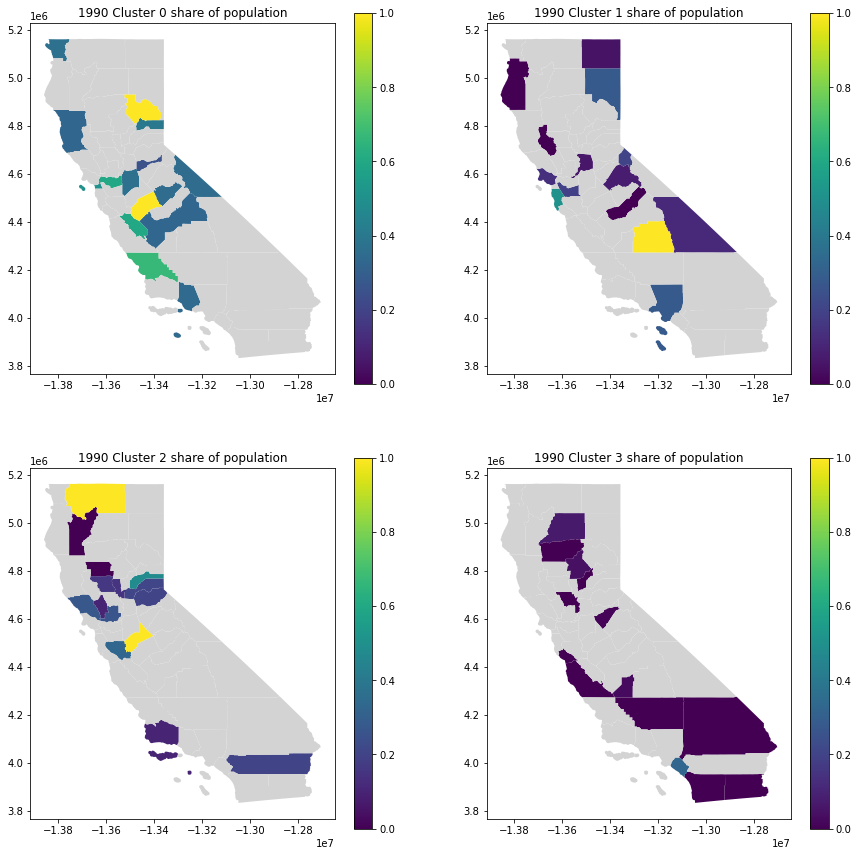

In [99]:
#plot maps - make regions with 0 % grey
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax1 = cluster0_1990_geo.plot(axes=ax1,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 0 share of population')
ax2 = fig.add_subplot(2,2,2)
ax2 = cluster1_1990_geo.plot(axes=ax2,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 1 share of population')
ax3 = fig.add_subplot(2,2,3)
ax3 = cluster2_1990_geo.plot(axes=ax3,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 2 share of population')
ax4 = fig.add_subplot(2,2,4)
ax4 = cluster3_1990_geo.plot(axes=ax4,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 3 share of population')
plt.show()


C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(
C:\Users\Aren Kabarajian\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consist

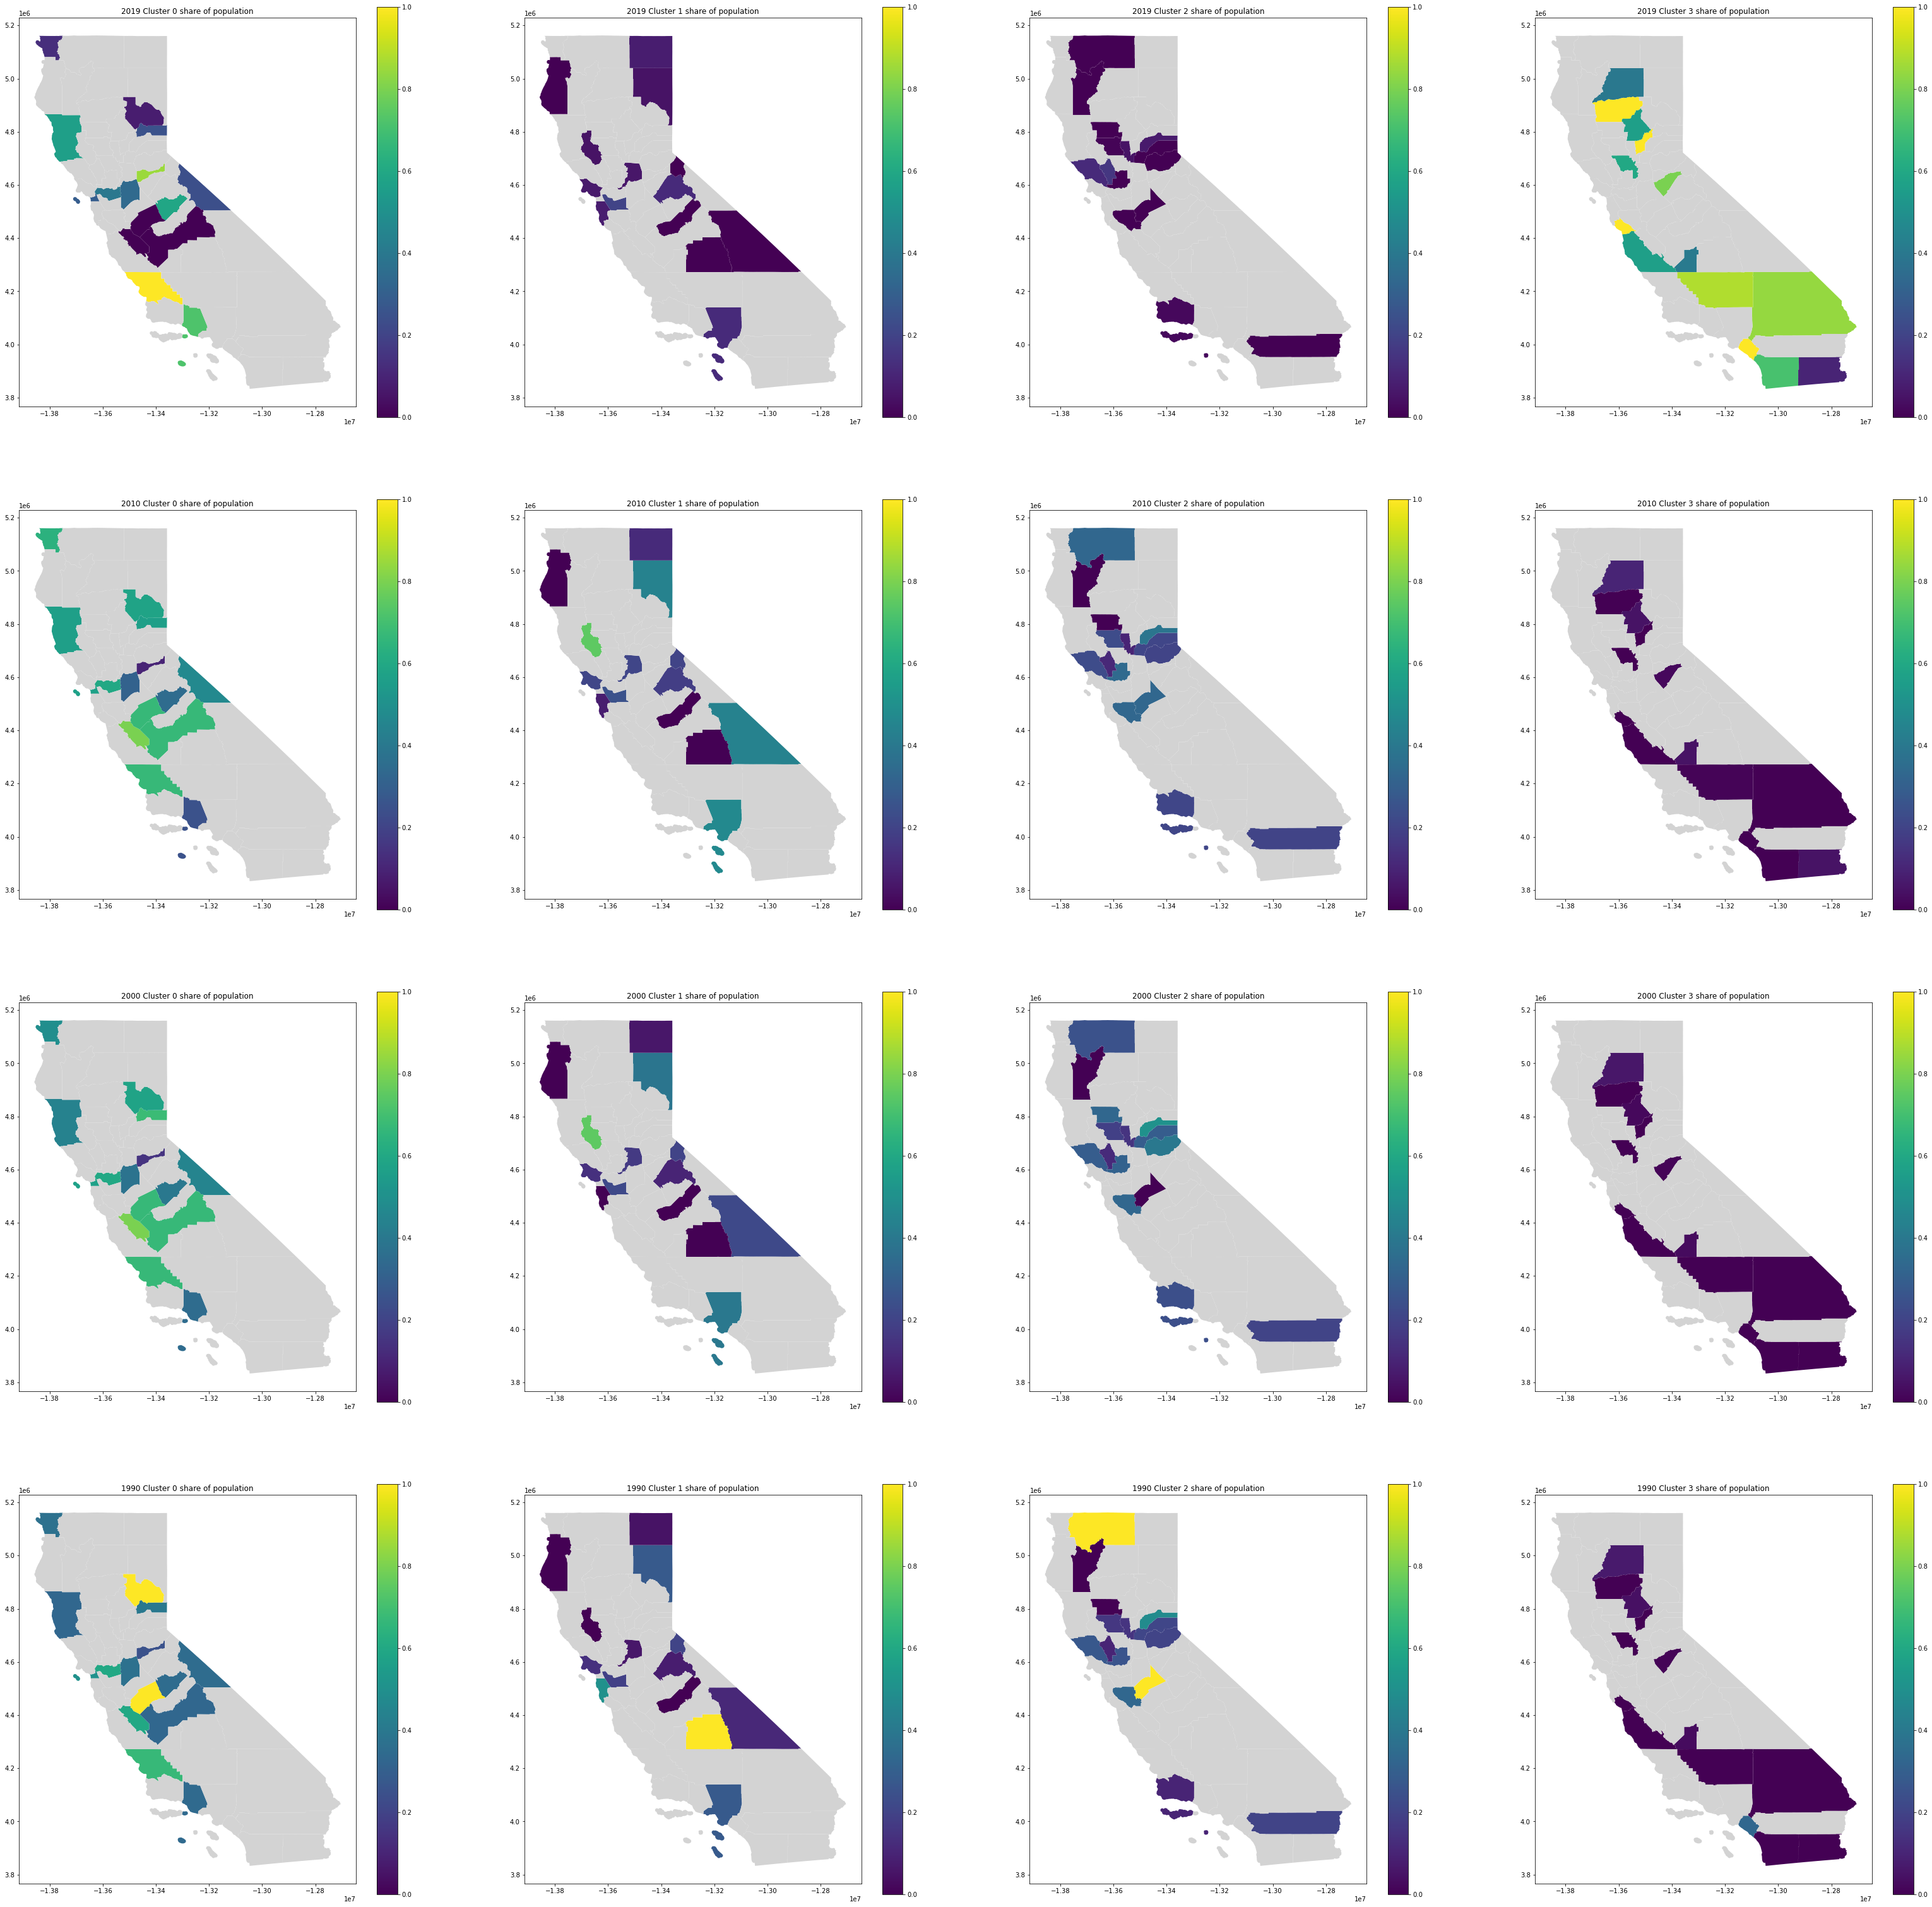

In [100]:
#plot maps - make regions with 0 % grey
fig = plt.figure(figsize=(55,55))
ax1 = fig.add_subplot(4,4,1)
ax1 = cluster0_2019_geo.plot(axes=ax1,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 0 share of population')
ax2 = fig.add_subplot(4,4,2)
ax2 = cluster1_2019_geo.plot(axes=ax2,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 1 share of population')
ax3 = fig.add_subplot(4,4,3)
ax3 = cluster2_2019_geo.plot(axes=ax3,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 2 share of population')
ax4 = fig.add_subplot(4,4,4)
ax4 = cluster3_2019_geo.plot(axes=ax4,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2019 Cluster 3 share of population')
#plot maps - make regions with 0 % grey
#plot maps - make regions with 0 % grey
ax5 = fig.add_subplot(4,4,5)
ax5 = cluster0_2010_geo.plot(axes=ax5,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 0 share of population')
ax6 = fig.add_subplot(4,4,6)
ax6 = cluster1_2010_geo.plot(axes=ax6,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 1 share of population')
ax7 = fig.add_subplot(4,4,7)
ax7 = cluster2_2010_geo.plot(axes=ax7,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 2 share of population')
ax8 = fig.add_subplot(4,4,8)
ax8 = cluster3_2010_geo.plot(axes=ax8,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2010 Cluster 3 share of population')
#plot maps - make regions with 0 % grey
ax9 = fig.add_subplot(4,4,9)
ax9 = cluster0_2000_geo.plot(axes=ax9,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 0 share of population')
ax10 = fig.add_subplot(4,4,10)
ax10 = cluster1_2000_geo.plot(axes=ax10,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 1 share of population')
ax11 = fig.add_subplot(4,4,11)
ax11 = cluster2_2000_geo.plot(axes=ax11,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 2 share of population')
ax12 = fig.add_subplot(4,4,12)
ax12 = cluster3_2000_geo.plot(axes=ax12,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('2000 Cluster 3 share of population')
#plot maps - make regions with 0 % grey
ax13 = fig.add_subplot(4,4,13)
ax13 = cluster0_1990_geo.plot(axes=ax13,column="perc_pop",legend=True,missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 0 share of population')
ax14 = fig.add_subplot(4,4,14)
ax14 = cluster1_1990_geo.plot(axes=ax14,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 1 share of population')
ax15 = fig.add_subplot(4,4,15)
ax15 = cluster2_1990_geo.plot(axes=ax15,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 2 share of population')
ax16 = fig.add_subplot(4,4,16)
ax16 = cluster3_1990_geo.plot(axes=ax16,column="perc_pop",legend=True, missing_kwds={'color': 'lightgrey'},vmin=0,vmax=1)
plt.title('1990 Cluster 3 share of population')
plt.show()
